In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
seed = 2407

In [2]:
# Load data
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
# Drop the 'Over18', 'EmployeeNumber', 'StandardHours' and 'EmployeeCount' columns
df.drop('EmployeeNumber', axis=1, inplace=True)
df.drop('Over18', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)

# Since 'MonthlyIncome' is more a accurate indicator of employee salary
df.drop('DailyRate', axis=1, inplace=True)
df.drop('HourlyRate', axis=1, inplace=True)
df.drop('MonthlyRate', axis=1, inplace=True)

# Drop Personal factors
df.drop('Age', axis=1, inplace=True)
df.drop('DistanceFromHome', axis=1, inplace=True)
df.drop('Education', axis=1, inplace=True)
df.drop('EducationField', axis=1, inplace=True)
df.drop('EnvironmentSatisfaction', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('JobSatisfaction', axis=1, inplace=True)
df.drop('MaritalStatus', axis=1, inplace=True)
df.drop('NumCompaniesWorked', axis=1, inplace=True)
df.drop('PerformanceRating', axis=1, inplace=True)
df.drop('RelationshipSatisfaction', axis=1, inplace=True)
df.drop('TotalWorkingYears', axis=1, inplace=True)
df.drop('YearsAtCompany', axis=1, inplace=True)
df.drop('YearsInCurrentRole', axis=1, inplace=True)

In [4]:
# Label categorical data
from sklearn.preprocessing import OrdinalEncoder

# Nominal variables
df['Attrition'] = df['Attrition'].astype('category')
df['Department'] = df['Department'].astype('category')
df['JobRole'] = df['JobRole'].astype('category')
df['OverTime'] = df['OverTime'].astype('category')

# Convert string to numeric
df[['BusinessTravel']] = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']]).fit_transform(df[['BusinessTravel']])

# Ordinal variables
df['BusinessTravel'] = df['BusinessTravel'].astype(pd.CategoricalDtype(categories=[0, 1, 2], ordered=True))
df['JobInvolvement'] = df['JobInvolvement'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))
df['JobLevel'] = df['JobLevel'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True))
df['StockOptionLevel'] = df['StockOptionLevel'].astype(pd.CategoricalDtype(categories=[0, 1, 2, 3], ordered=True))
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Attrition                1470 non-null   category
 1   BusinessTravel           1470 non-null   category
 2   Department               1470 non-null   category
 3   JobInvolvement           1470 non-null   category
 4   JobLevel                 1470 non-null   category
 5   JobRole                  1470 non-null   category
 6   MonthlyIncome            1470 non-null   int64   
 7   OverTime                 1470 non-null   category
 8   PercentSalaryHike        1470 non-null   int64   
 9   StockOptionLevel         1470 non-null   category
 10  TrainingTimesLastYear    1470 non-null   int64   
 11  WorkLifeBalance          1470 non-null   category
 12  YearsSinceLastPromotion  1470 non-null   int64   
 13  YearsWithCurrManager     1470 non-null   int64   
dtypes: categ

,MonthlyIncome,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,15.209524,2.799320,2.187755,4.123129
std,4707.956783,3.659938,1.289271,3.222430,3.568136
min,1009.000000,11.000000,0.000000,0.000000,0.000000
25%,2911.000000,12.000000,2.000000,0.000000,2.000000
50%,4919.000000,14.000000,3.000000,1.000000,3.000000
75%,8379.000000,18.000000,3.000000,3.000000,7.000000
max,19999.000000,25.000000,6.000000,15.000000,17.000000


In [6]:
from scipy.stats import mstats

# log transformation
df["MonthlyIncome"] = np.log1p(df["MonthlyIncome"])
df["PercentSalaryHike"] = np.log1p(df["PercentSalaryHike"])

# winsorization
df["TrainingTimesLastYear"] = mstats.winsorize(df["TrainingTimesLastYear"], limits=[0.05, 0.1])
df["YearsSinceLastPromotion"] = mstats.winsorize(df["YearsSinceLastPromotion"], limits=[0, 0.1])
df["YearsWithCurrManager"] = mstats.winsorize(df["YearsWithCurrManager"], limits=[0, 0.1])

In [7]:
# One-hot-encoding
df = pd.get_dummies(df, drop_first=True)
df

,MonthlyIncome,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_1,BusinessTravel_2,Department_Research & Development,Department_Sales,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,8.698514,2.484907,1,0,5,True,True,False,False,True,...,False,True,False,True,False,False,False,False,False,False
1,8.543056,3.178054,3,1,7,False,False,True,True,False,...,True,False,False,False,True,False,False,False,True,False
2,7.645398,2.772589,3,0,0,True,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,7.975908,2.484907,3,3,0,False,False,True,True,False,...,True,False,False,True,False,False,False,False,True,False
4,8.151622,2.564949,3,2,2,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,7.852439,2.890372,3,0,3,False,False,True,True,False,...,False,False,False,False,True,False,False,False,True,False
1466,9.209540,2.772589,5,1,7,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1467,8.723069,3.044522,1,0,3,False,True,False,True,False,...,False,False,False,True,True,False,False,False,True,False
1468,8.592486,2.708050,3,0,8,False,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, roc_curve
import tensorflow as tf

In [9]:
# Separate features from predicted variable for each age group
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, shuffle=True)

In [11]:
# Split the data into validation and testing sets
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed, shuffle=True)

# 70% train, 15% test, 15% validation

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
X_scaled_validation = scaler.transform(X_validation)

In [13]:
# Balance the data sets
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=seed)
X_smote_train, y_smote_train = oversampler.fit_resample(X_scaled_train, y_train)

In [14]:
# Balance the data sets
from imblearn.over_sampling import ADASYN
oversampler = ADASYN(random_state=seed)
X_adasyn_train, y_adasyn_train = oversampler.fit_resample(X_scaled_train, y_train)

<h1>Logistic Regression</h1>
Logistic Regression is a statistical method used for binary classification problems, where the target variable has two possible outcomes, typically denoted as 0 and 1. It is a type of regression analysis that models the probability of a binary outcome based on one or more predictor variables.

In Logistic Regression, the relationship between the predictor variables and the binary outcome is modeled using the logistic (sigmoid) function. The logistic function maps any input value to a value between 0 and 1, representing the probability of the positive outcome. The model estimates the coefficients for each predictor variable, which indicate the strength and direction of the relationship between the predictors and the outcome.

Logistic Regression assumes that the relationship between the predictors and the log odds of the outcome is linear. The log odds are then transformed using the logistic function to obtain the probability of the positive outcome.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [16]:
# Create a base logistic regression model
logistic_model = LogisticRegression(random_state=seed)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=2407)

In [17]:
# Predictions
y_train_pred = logistic_model.predict(X_train)
y_validation_pred = logistic_model.predict(X_validation)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.879455    0.720000  0.867833     0.799727      0.853267
recall       0.975581    0.319527  0.867833     0.647554      0.867833
f1-score     0.925028    0.442623  0.867833     0.683825      0.845799
support    860.000000  169.000000  0.867833  1029.000000   1029.000000


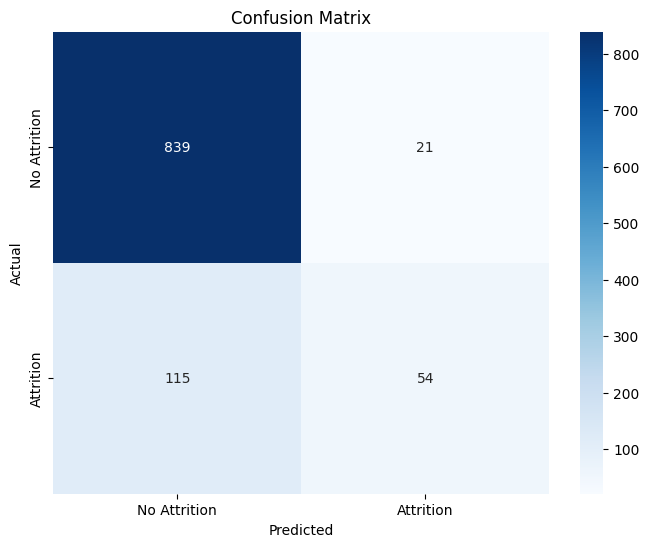

In [18]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.882075   0.750000  0.877273    0.816038      0.863465
recall       0.989418   0.193548  0.877273    0.591483      0.877273
f1-score     0.932668   0.307692  0.877273    0.620180      0.844604
support    189.000000  31.000000  0.877273  220.000000    220.000000


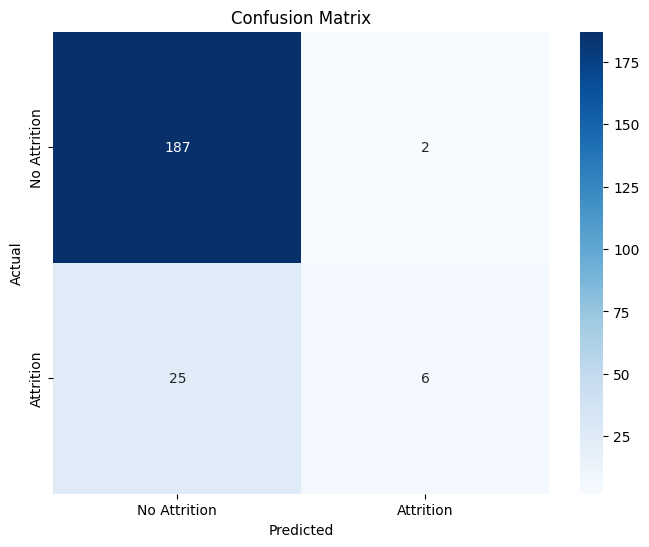

In [19]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As seen, while accuracy of the model on the test set is high (0.846939), this is due to the large number of true negatives. The model tends to predict "No Attrition" for most rows as it increases accuracy. Hence, to increase the number of "Attrition" predictions, a different metric needs to be used.

This is because logistic regression is optimised by maximising the log-likelihood objective function, which assumes equal importance for each class and aims to maximise overall accuracy. However, when dealing with imbalanced data, this approach can lead to models that are biased towards the majority class.

In the context of imbalanced data, the disproportionate representation of the majority class can overshadow the minority class, leading to suboptimal model performance. This bias towards the majority class can result in lower predictive accuracy for the minority class and misrepresentation of the true underlying patterns in the data.

Therefore, it's essential to class imbalance by using resampling methods like SMOTE or ADASYN, or adjusting the classification threshold. By doing so, we can mitigate the bias towards the majority class and improve the model's ability to accurately predict outcomes for both classes.

GridSearchCV is used to optimise the parameters of the logistic regression model. GridSearchCV performs an exhaustive search of specified parameter values to determine the most appropriate combination of values that results in the best performance for our dataset.


In [20]:
# Hyperparameter Tuning with Grid Search
param_grid = {'penalty': ['none', 'l1', 'l2'],
              'C': [0.01, 0.1, 1, 10],
              'solver': ['lbfgs', 'sag', 'saga']
              }

In [21]:
logistic_model = LogisticRegression(random_state=seed)
grid_search = GridSearchCV(estimator = logistic_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2407),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='recall')

In [22]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Recall Score: 0.8


In [23]:
# Best model
smote_logistic_model = grid_search.best_estimator_

# Predictions
y_train_pred = smote_logistic_model.predict(X_smote_train)
y_validation_pred = smote_logistic_model.predict(X_scaled_validation)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.797378    0.783201  0.790116     0.790289      0.790289
recall       0.777907    0.802326  0.790116     0.790116      0.790116
f1-score     0.787522    0.792648  0.790116     0.790085      0.790085
support    860.000000  860.000000  0.790116  1720.000000   1720.000000


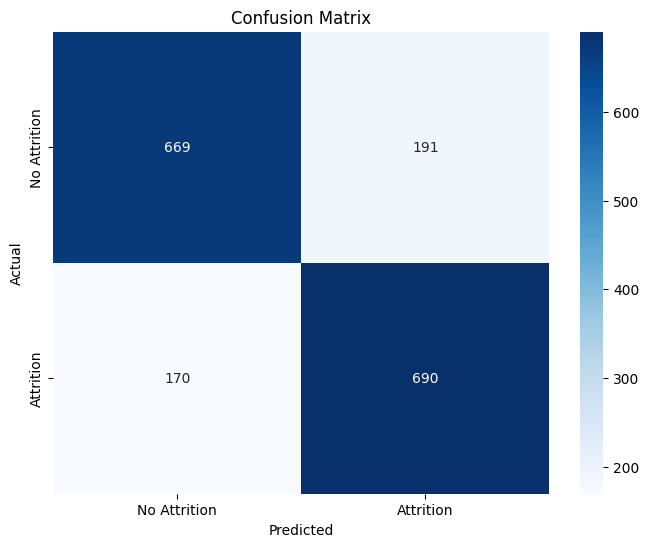

In [24]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_smote_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.962264   0.409836  0.809091    0.686050      0.884422
recall       0.809524   0.806452  0.809091    0.807988      0.809091
f1-score     0.879310   0.543478  0.809091    0.711394      0.831989
support    189.000000  31.000000  0.809091  220.000000    220.000000


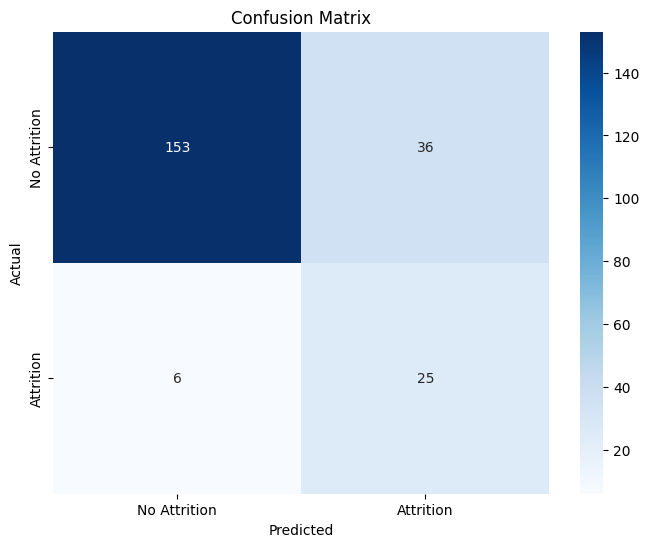

In [25]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.924528   0.403226  0.778281    0.663877      0.837251
recall       0.798913   0.675676  0.778281    0.737294      0.778281
f1-score     0.857143   0.505051  0.778281    0.681097      0.798195
support    184.000000  37.000000  0.778281  221.000000    221.000000


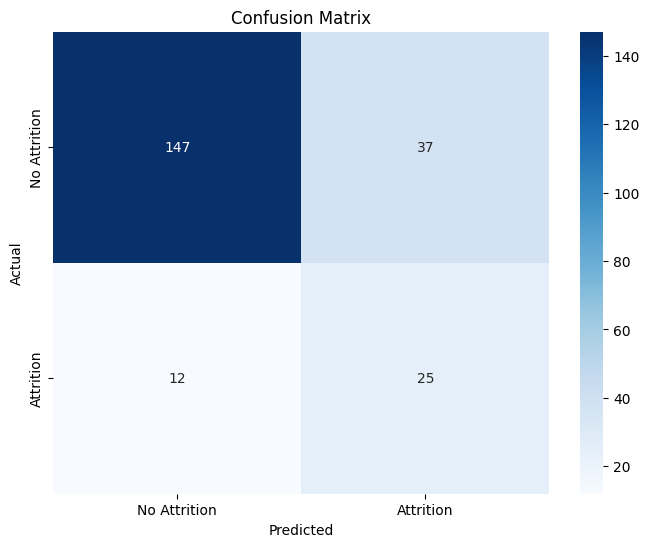

In [26]:
# Finally, predict on test set
y_test_pred = smote_logistic_model.predict(X_scaled_test)

print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Hyperparameter Tuning with Grid Search
param_grid = {'penalty': ['none', 'l1', 'l2'],
              'C': [0.01, 0.1, 1, 10],
              'solver': ['lbfgs', 'sag', 'saga']
              }

In [28]:
logistic_model = LogisticRegression(random_state=seed)
grid_search = GridSearchCV(estimator = logistic_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_adasyn_train, y_adasyn_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2407),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='recall')

In [29]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Recall Score: 0.7927987742594483


In [30]:
# Best model
adasyn_logistic_model = grid_search.best_estimator_

# Predictions
y_train_pred = adasyn_logistic_model.predict(X_adasyn_train)
y_validation_pred = adasyn_logistic_model.predict(X_scaled_validation)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.800995    0.769968   0.78428     0.785482      0.785277
recall       0.748837    0.818800   0.78428     0.783818      0.784280
f1-score     0.774038    0.793633   0.78428     0.783836      0.783965
support    860.000000  883.000000   0.78428  1743.000000   1743.000000


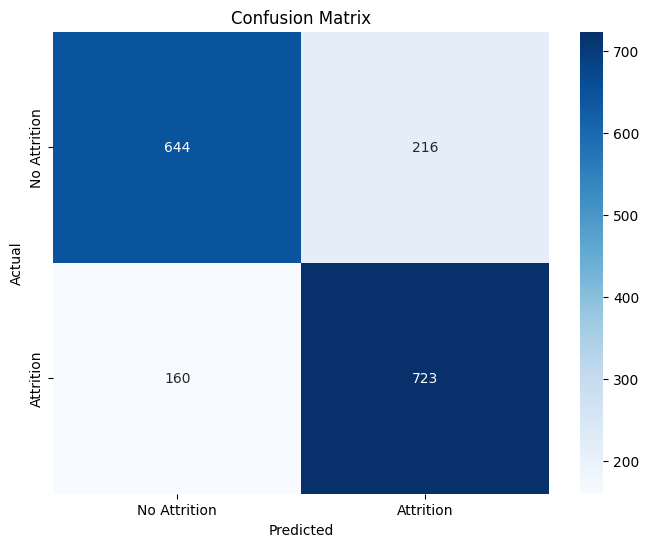

In [31]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_adasyn_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.967949   0.406250  0.804545    0.687099      0.888800
recall       0.798942   0.838710  0.804545    0.818826      0.804545
f1-score     0.875362   0.547368  0.804545    0.711365      0.829145
support    189.000000  31.000000  0.804545  220.000000    220.000000


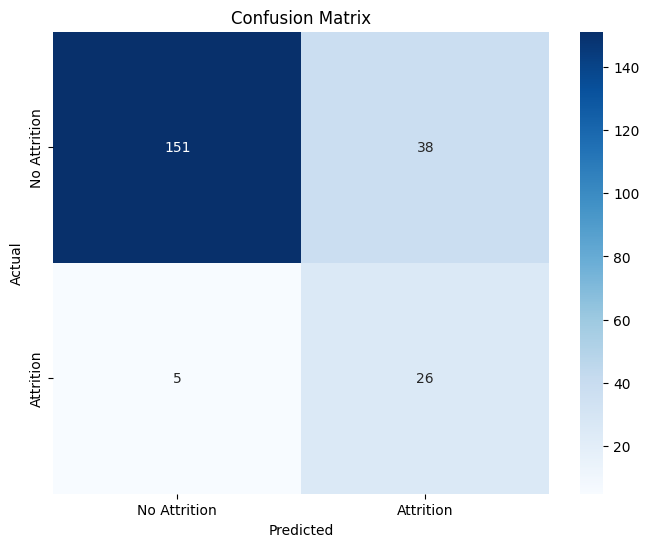

In [32]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.921569   0.367647  0.751131    0.644608      0.828831
recall       0.766304   0.675676  0.751131    0.720990      0.751131
f1-score     0.836795   0.476190  0.751131    0.656493      0.776423
support    184.000000  37.000000  0.751131  221.000000    221.000000


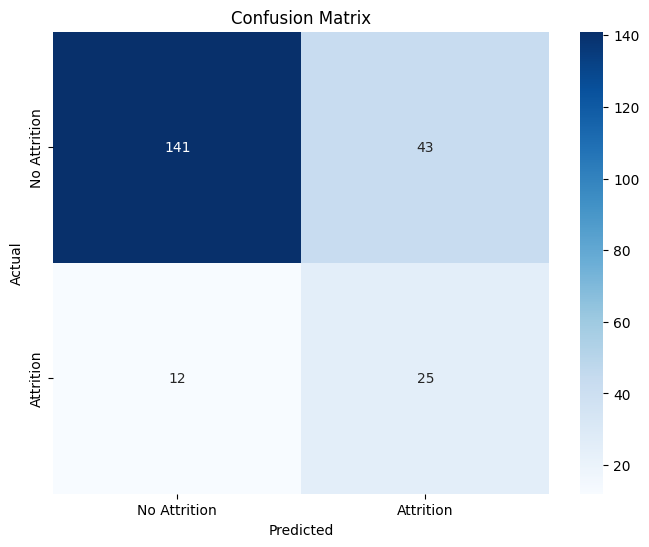

In [33]:
# Finally, predict on test set
y_test_pred = adasyn_logistic_model.predict(X_scaled_test)

print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ADASYN achieved a higher recall on the test set, with a final recall of 0.81 and precision of 0.49.

Finally, the ROC curve for logistic regression trained on SMOTE is plotted. The ROC curve is a graphical representation of the TPR against the FPR for various threshold values of the classifier.

A steeper ROC curve closer to the top-left corner indicates better performance, and a higher AUC value indicates better discrimination ability of the classifier.

In [34]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [35]:
y_pred_log = adasyn_logistic_model.predict_proba(X_scaled_test)[:,1].ravel()

# Calculate the ROC curve
fpr_log, tpr_log, thresholds_keras = roc_curve(y_test, y_pred_log)
auc_log = auc(fpr_log, tpr_log)

# Calculate the Precision-Recall curve
precision_log, recall_log, _ = precision_recall_curve(y_test, y_pred_log)
pr_auc_log = average_precision_score(y_test, y_pred_log)

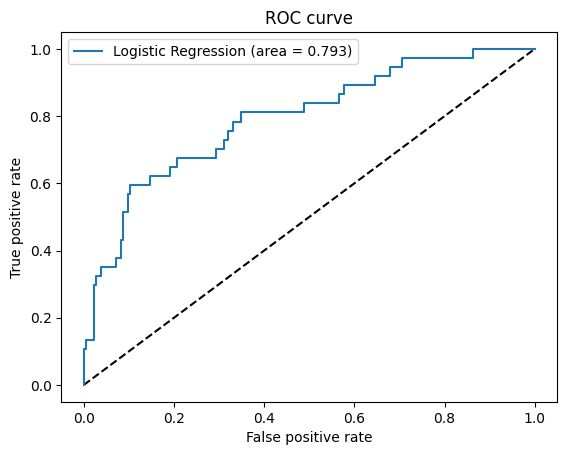

In [36]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = {:.3f})'.format(auc_log))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

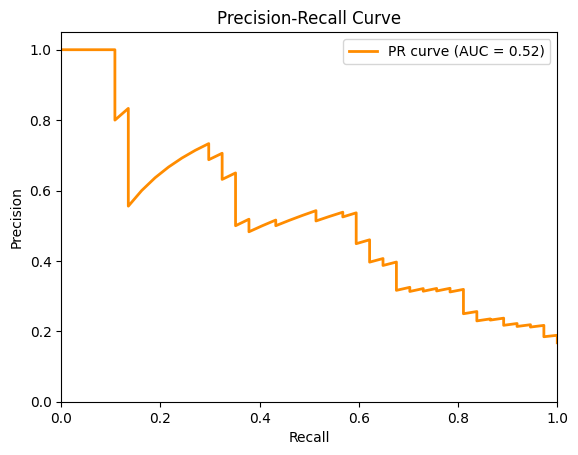

In [37]:
# Plot the Precision-Recall curve
plt.plot(recall_log, precision_log, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_log)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

An AUC of 0.86 implies that the curve generally performs well in differentiating between the classes, as it's closer to the perfect value of 1.

In the case of our business problem, maximising true positives is more crucial than minimising false positives. As such, the optimal model is one which lies closer to the top of the curve. 

<h1>Neural Network</h1>

A neural network is a computational model consisting of interconnected neurons organised into layers. Each neuron receives input signals, performs a weighted sum of these inputs, applies an activation function to the sum, and then passes the result to the neurons in the next layer. Neural networks are capable of learning complex patterns and relationships from data through a process called training, where the network adjusts its weights and biases to minimise the difference between the predicted and actual outputs.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
# Create a basic neural network with one hidden layer which squishes the data into range 0-1
def neural_network(X_train):
    # Defining the model
    model = Sequential([
        Dense(X_train.shape[1], activation='relu'),
        Dense(64, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])
    
    # Compiling the model
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=[
                        'accuracy'
                    ])
    
    return model

In [40]:
model_nn = neural_network(X_scaled_train)
 
history = model_nn.fit(X_scaled_train, y_train, batch_size=128,
                    epochs=25, validation_data=(X_scaled_validation, y_validation),
                    )


Epoch 1/25


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7852 - loss: 0.5312 - val_accuracy: 0.8500 - val_loss: 0.4437
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8316 - loss: 0.4957 - val_accuracy: 0.8545 - val_loss: 0.4119
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.4301 - val_accuracy: 0.8591 - val_loss: 0.3995
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8242 - loss: 0.4321 - val_accuracy: 0.8591 - val_loss: 0.3844
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8369 - loss: 0.3937 - val_accuracy: 0.8591 - val_loss: 0.3724
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3847 - val_accuracy: 0.8591 - val_loss: 0.3616
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8271 - loss: 0.3954 - val_accuracy: 0.8636 - val_loss: 0.3528
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8434 - loss: 0.3627 - val_accuracy: 0.8636 - val_loss: 0.3436
Epoch 9/25
9/9 ━━━

 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


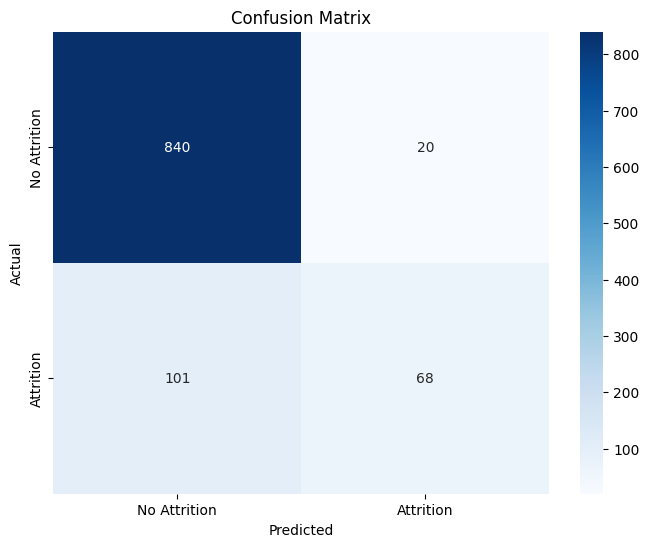

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.892667    0.772727   0.88241     0.832697      0.872969
recall       0.976744    0.402367   0.88241     0.689556      0.882410
f1-score     0.932815    0.529183   0.88241     0.730999      0.866524
support    860.000000  169.000000   0.88241  1029.000000   1029.000000


In [41]:
# Test the model accuracy
y_pred_prob = model_nn.predict(X_scaled_train)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_train_np = y_train.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_train_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


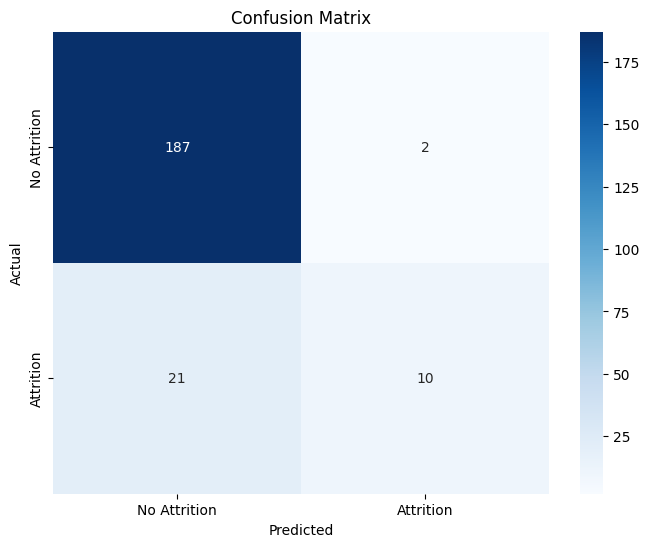

======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.899038   0.833333  0.895455    0.866186      0.889780
recall       0.989418   0.322581  0.895455    0.655999      0.895455
f1-score     0.942065   0.465116  0.895455    0.703591      0.874859
support    189.000000  31.000000  0.895455  220.000000    220.000000


In [42]:
# Test the model accuracy on the validation set
y_pred_prob = model_nn.predict(X_scaled_validation)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_validation_np = y_validation.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_validation_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

Although the model accuracy is high, this is due to the large number of rows with attrition equal to "False" compared to "True". Predicting all "False" would already result in a very high accuracy. However, since identifying attrition is the goal, it is important to identify all cases where attrition is present even if they are wrongly identified (i.e. maximising recall). As such, hyperparameter tuning is needed. Moreover, the model is overfitted as train accuracy is 100% but test accuracy is only 86%. Early stopping is needed to allow generalisation to unseen data.

Train a better model by tuning hyperparameters:

Add another layer - map out more complex features<br>
Vary number of nodes - reduce impact of irrelevant features<br>
Change activation function - allows the model to identify non-linear patterns in a different way<br>
Use 'AUC', 'precision', 'recall', 'f1_score' metrics - maximise precision and recall over accuracy<br>
Reduce batch size - allow model to fit the train data better at the expense of time<br>
Use early stopping - ensure that model does not overfit to train data

In [43]:
def optimised_neural_network(X_train):
    # Defining the model
    model = Sequential()
    model.add(Dense(X_train.shape[1], activation='tanh'))
    model.add(Dense(60, activation = 'tanh'))
    model.add(Dense(40, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))
 
    # Compiling the model
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=[
                        'recall',
                    ])
    
    return model

In [44]:
# Stop early to prevent overfitting
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

In [45]:
model2_nn = optimised_neural_network(X_smote_train)
 
history = model2_nn.fit(X_smote_train, y_smote_train, batch_size=10,
                    epochs=25, validation_data=(X_scaled_validation, y_validation),
                    callbacks=[earlystopping])

Epoch 1/25


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5862 - recall: 0.7747 - val_loss: 0.5158 - val_recall: 0.8065
Epoch 2/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.4629 - recall: 0.8241 - val_loss: 0.4805 - val_recall: 0.8065
Epoch 3/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.4259 - recall: 0.8320 - val_loss: 0.4751 - val_recall: 0.6774
Epoch 4/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.3972 - recall: 0.8780 - val_loss: 0.3768 - val_recall: 0.6452
Epoch 5/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.3840 - recall: 0.8488 - val_loss: 0.4019 - val_recall: 0.7097
Epoch 6/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.3665 - recall: 0.8816 - val_loss: 0.4065 - val_recall: 0.6452
Epoch 7/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.3414 - recall: 0.8830 - val_loss: 0.4282 - val_recall: 0.6774
Epoch 8/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.2954 - recall: 0.9216 - val_loss: 0.4146 - val_recall: 0.7097
Epoch

 1/54 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


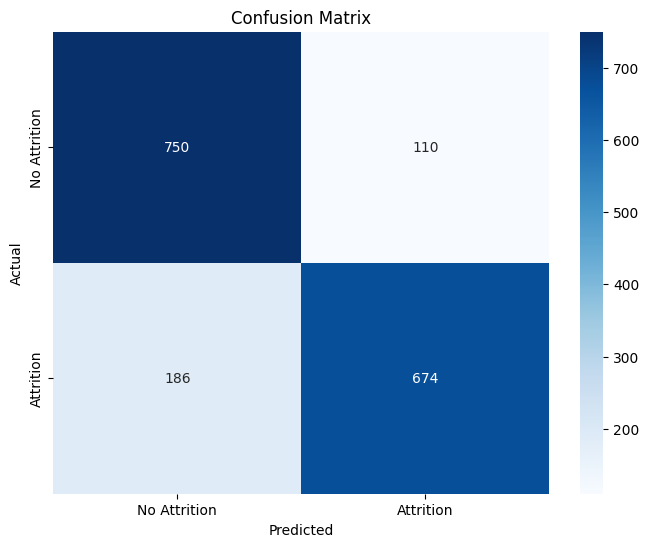

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.801282    0.859694  0.827907     0.830488      0.830488
recall       0.872093    0.783721  0.827907     0.827907      0.827907
f1-score     0.835189    0.819951  0.827907     0.827570      0.827570
support    860.000000  860.000000  0.827907  1720.000000   1720.000000


In [46]:
# Test the model accuracy
y_pred_prob = model2_nn.predict(X_smote_train)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_smote_train_np = y_smote_train.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_smote_train_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step


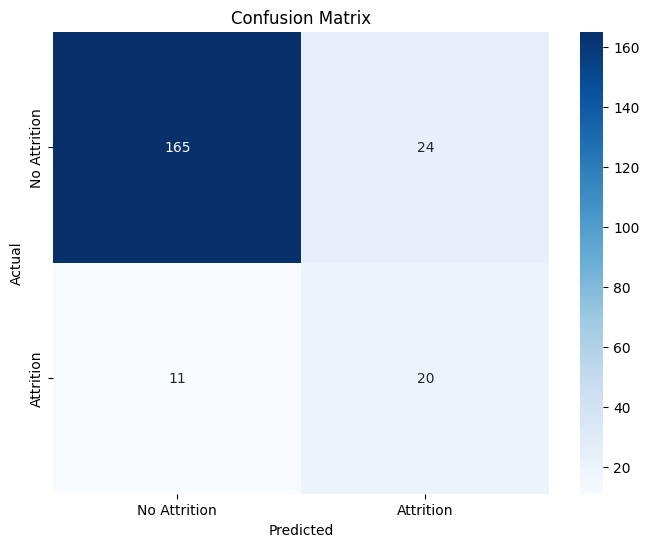

======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.937500   0.454545  0.840909    0.696023      0.869447
recall       0.873016   0.645161  0.840909    0.759089      0.840909
f1-score     0.904110   0.533333  0.840909    0.718721      0.851864
support    189.000000  31.000000  0.840909  220.000000    220.000000


In [47]:
# Test the model accuracy
y_pred_prob = model2_nn.predict(X_scaled_validation)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_validation_np = y_validation.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_validation_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


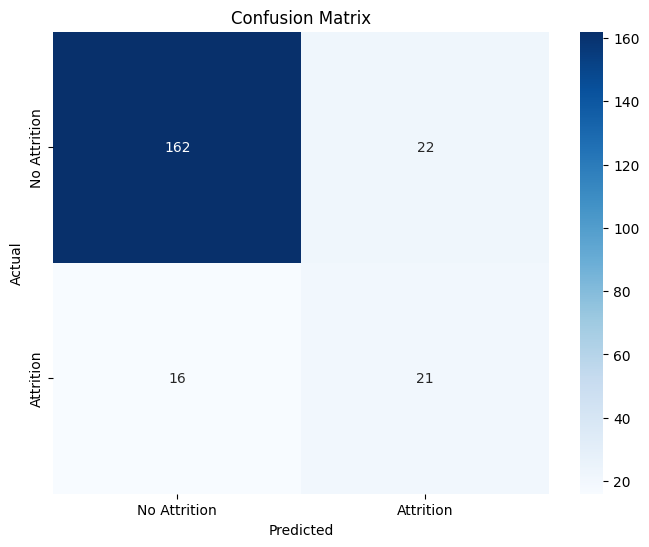

======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.910112   0.488372  0.828054    0.699242      0.839504
recall       0.880435   0.567568  0.828054    0.724001      0.828054
f1-score     0.895028   0.525000  0.828054    0.710014      0.833077
support    184.000000  37.000000  0.828054  221.000000    221.000000


In [48]:
# Finally, test the model accuracy on test set
y_pred_prob = model2_nn.predict(X_scaled_test)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_test_np = y_test.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_test_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

The recall increase significantly while precision decreases slightly. This shows that the model is able to identify more cases of attrition correctly at the expense of more incorrect predictions. However, as the cost of attrition is greater than the cost to prevent attrition, this decrease in accuracy and precision is justified.

We can find the optimal classification threshold using the ROC curve. The ROC curve compares the ratio of TPR to FPR across different classification thresholds. Finding the balance that maximises TPR (recall) can further optimise the model.

In [49]:
model3_nn = optimised_neural_network(X_adasyn_train)
 
history = model3_nn.fit(X_adasyn_train, y_adasyn_train, batch_size=10,
                    epochs=25, validation_data=(X_scaled_validation, y_validation),
                    callbacks=[earlystopping])

Epoch 1/25


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5974 - recall: 0.8283 - val_loss: 0.4706 - val_recall: 0.6774
Epoch 2/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.4922 - recall: 0.7997 - val_loss: 0.4672 - val_recall: 0.7419
Epoch 3/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.4723 - recall: 0.8212 - val_loss: 0.4587 - val_recall: 0.7742
Epoch 4/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.4251 - recall: 0.8397 - val_loss: 0.4890 - val_recall: 0.7419
Epoch 5/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.3999 - recall: 0.8503 - val_loss: 0.4081 - val_recall: 0.7097


 1/55 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step


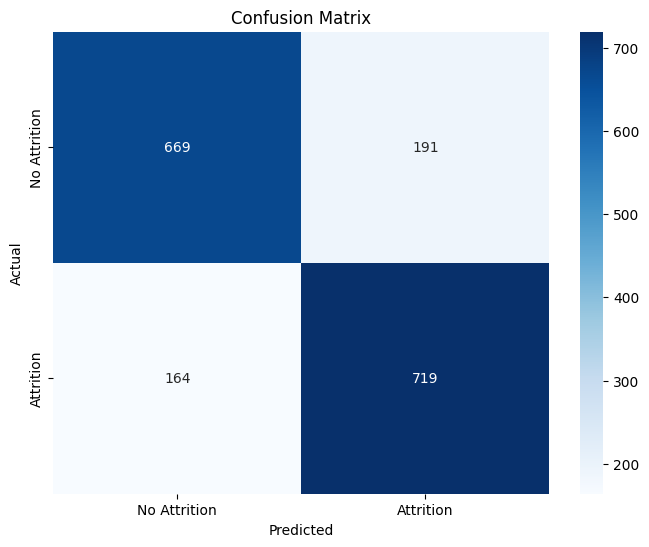

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.803121    0.790110  0.796328     0.796616      0.796530
recall       0.777907    0.814270  0.796328     0.796088      0.796328
f1-score     0.790313    0.802008  0.796328     0.796160      0.796238
support    860.000000  883.000000  0.796328  1743.000000   1743.000000


In [50]:
# Test the model accuracy
y_pred_prob = model3_nn.predict(X_adasyn_train)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_adasyn_train_np = y_adasyn_train.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_adasyn_train_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


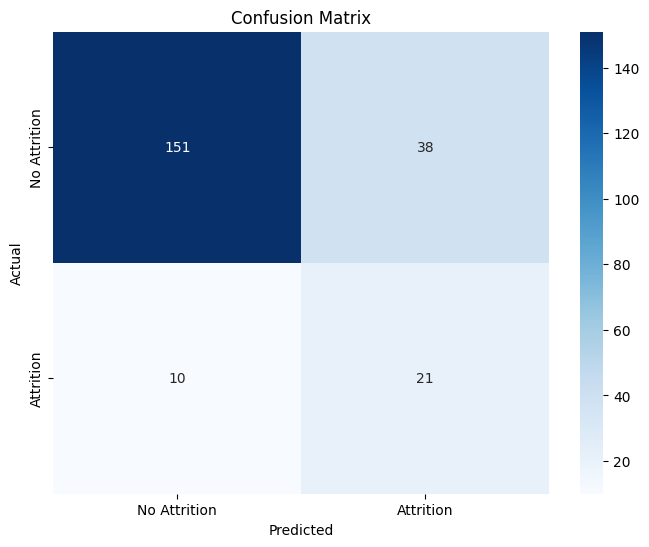

======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.937888   0.355932  0.781818    0.646910      0.855885
recall       0.798942   0.677419  0.781818    0.738181      0.781818
f1-score     0.862857   0.466667  0.781818    0.664762      0.807030
support    189.000000  31.000000  0.781818  220.000000    220.000000


In [51]:
# Test the model accuracy
y_pred_prob = model3_nn.predict(X_scaled_validation)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_validation_np = y_validation.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_validation_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step


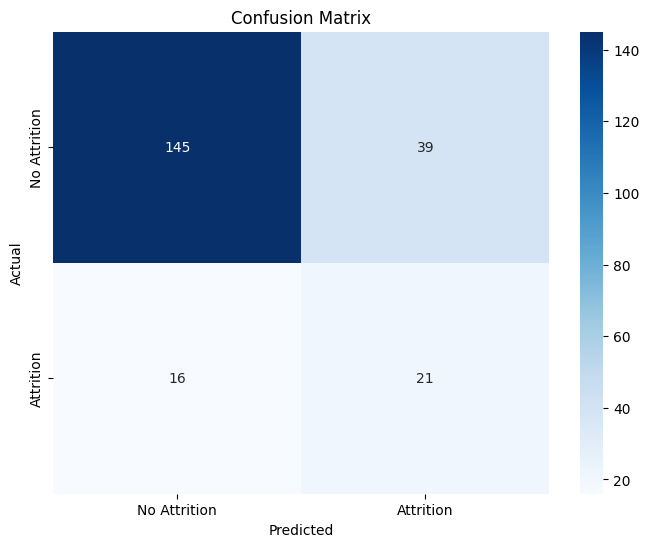

======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.900621   0.350000  0.751131    0.625311      0.808436
recall       0.788043   0.567568  0.751131    0.677806      0.751131
f1-score     0.840580   0.432990  0.751131    0.636785      0.772341
support    184.000000  37.000000  0.751131  221.000000    221.000000


In [52]:
# Test the model accuracy on test set
y_pred_prob = model3_nn.predict(X_scaled_test)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_test_np = y_test.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_test_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

ADASYN produces the better model

In [53]:
y_pred_nn = model3_nn.predict(X_scaled_test).ravel()

# Calculate the ROC curve
fpr_nn, tpr_nn, thresholds_keras = roc_curve(y_test, y_pred_nn)
auc_nn = auc(fpr_nn, tpr_nn)

# Calculate the Precision-Recall curve
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_nn)
pr_auc_nn = average_precision_score(y_test, y_pred_nn)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


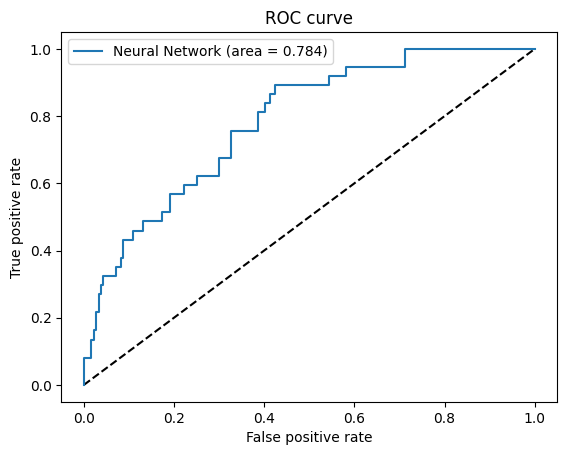

In [54]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

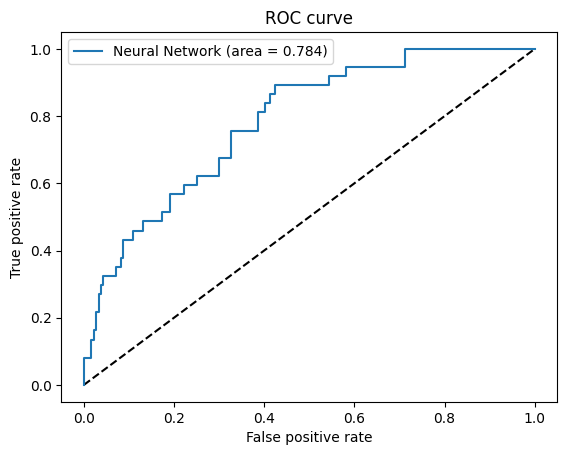

In [55]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

<h1>CART Decision Tree</h1>

CART is a model that recursively partitions the feature space into disjoint regions, guided by the values of predictor variables, to perform classification or regression tasks. In the context of our business problem, CART builds a binary tree where each internal node represents a decision based on a specific feature, and each leaf node represents a class label. The decision at each node is made by splitting the data into subsets based on a chosen splitting criterion, typically aiming to maximise class purity or minimise impurity measures such as Gini impurity or entropy. CART iteratively selects the best split at each node until a stopping criterion is met, such as reaching a maximum tree depth or a minimum number of samples per leaf. The resulting decision tree provides a transparent and interpretable model for making predictions based on input features.

In the first step, the CART model is fitted on the training dataset without any constraints on tree size. This model grows to its maximum depth, resulting in overfitting to the training data.

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the decision tree classifier
cart = DecisionTreeClassifier(random_state = seed)
cart.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2407)

======== TRAIN SET RESULTS ========
Accuracy before pruning: 1.0

Classification Report: 
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    860.0  169.0       1.0     1029.0        1029.0


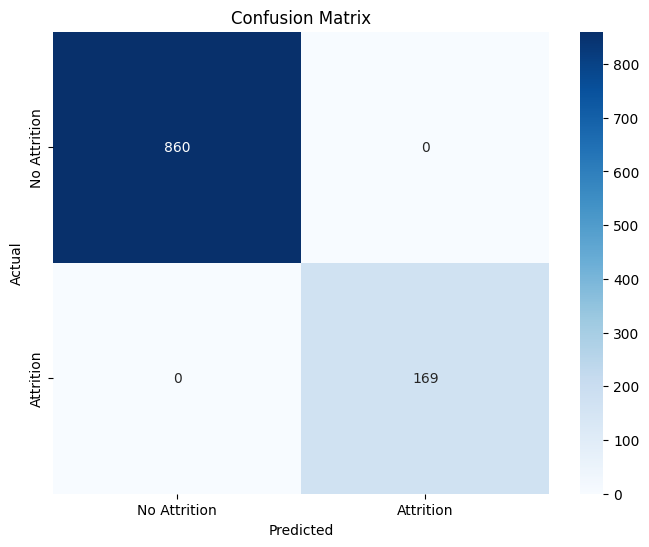

In [57]:
print("======== TRAIN SET RESULTS ========")
# Evaluate accuracy on the train set
y_train_pred = cart.predict(X_train)
accuracy_before_pruning = accuracy_score(y_train, y_train_pred)
print(f'Accuracy before pruning: {accuracy_before_pruning}')
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========
Accuracy before pruning: 0.8318181818181818

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.900000   0.400000  0.831818    0.650000      0.829545
recall       0.904762   0.387097  0.831818    0.645929      0.831818
f1-score     0.902375   0.393443  0.831818    0.647909      0.830662
support    189.000000  31.000000  0.831818  220.000000    220.000000


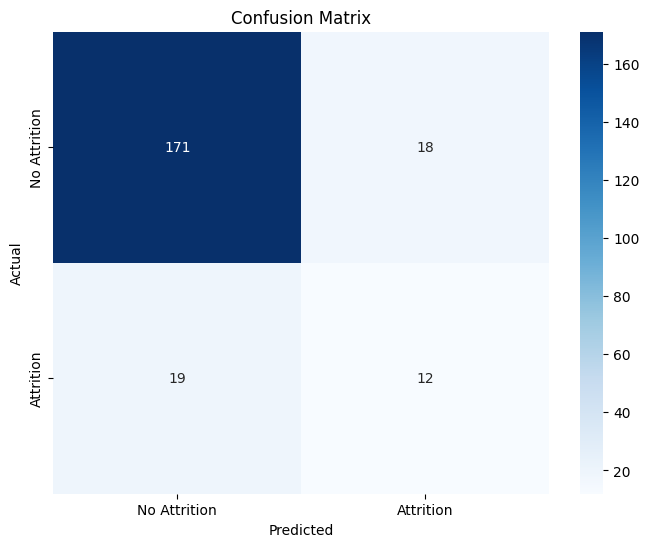

In [58]:
print("\n======== VALIDATION SET RESULTS ========")
# Evaluate accuracy on the test set
y_validation_pred = cart.predict(X_validation)
accuracy_before_pruning = accuracy_score(y_validation, y_validation_pred)
print(f'Accuracy before pruning: {accuracy_before_pruning}')
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

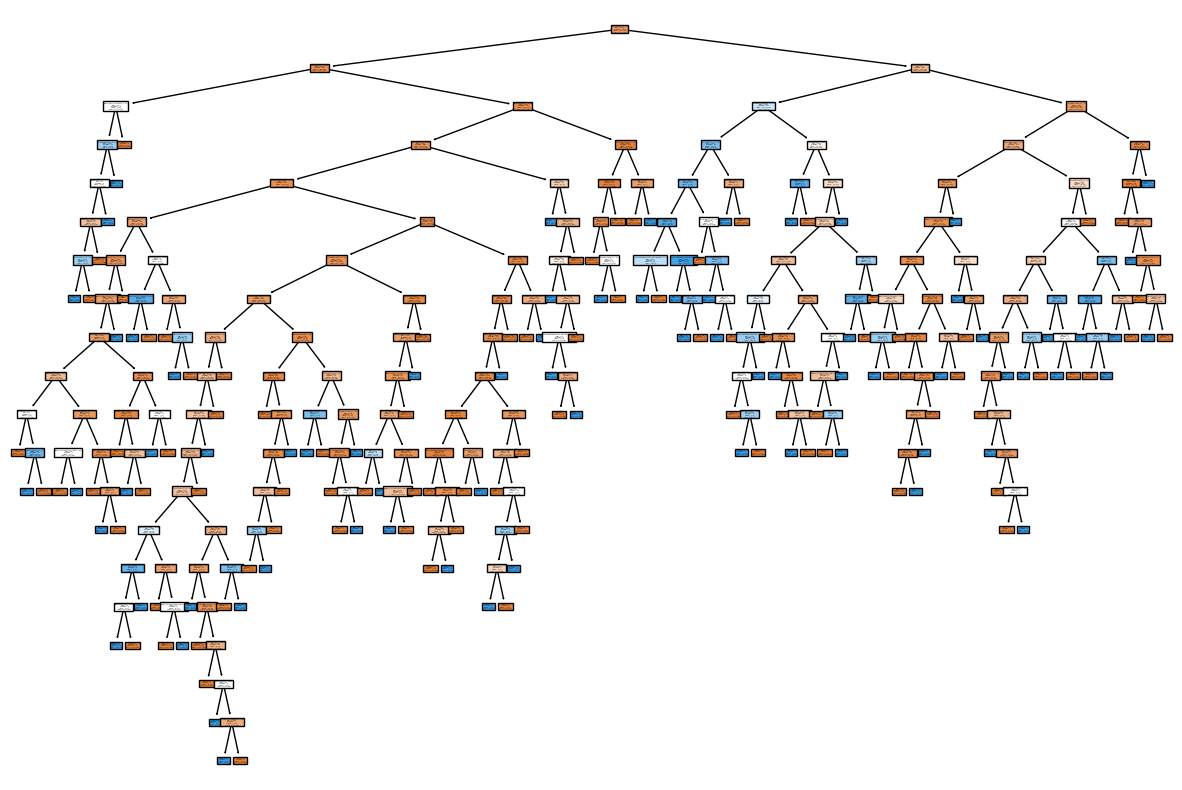

In [59]:
# Plot the tree without pruning
plt.figure(figsize=(15, 10))
plot_tree(cart, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

In the next step, the CART model is pruned at the optimal complexity parameter (CP). CP is a regularisation parameter that controls the trade-off between tree complexity and model performance. It penalises overly complex trees to prevent overfitting.

The CP error is minimised by selecting an optimal value for the complexity parameter through cross-validation, where different values of CP are evaluated, and the one that minimises validation error is chosen.

Pruning involves removing or collapsing certain branches of the decision tree to reduce its complexity and improve generalisation. 
Using cost-complexity pruning, nodes with the smallest increase in the complexity parameter (CP) error are removed iteratively. This is done until further pruning leads to a significant increase in validation error.

In [60]:
from sklearn.model_selection import cross_val_score

# Train decision trees with different depths (max depth = 19)
carts = []
depths = range(1, 19)

for depth in depths:
    cart = DecisionTreeClassifier(random_state = seed, max_depth=depth)

    # Perform cross-validation
    cv_scores = cross_val_score(cart, X_train, y_train, cv=10, scoring='recall')

    # Calculate mean cross-validation error
    cv_error = 1 - cv_scores.mean()
    carts.append(cv_error)

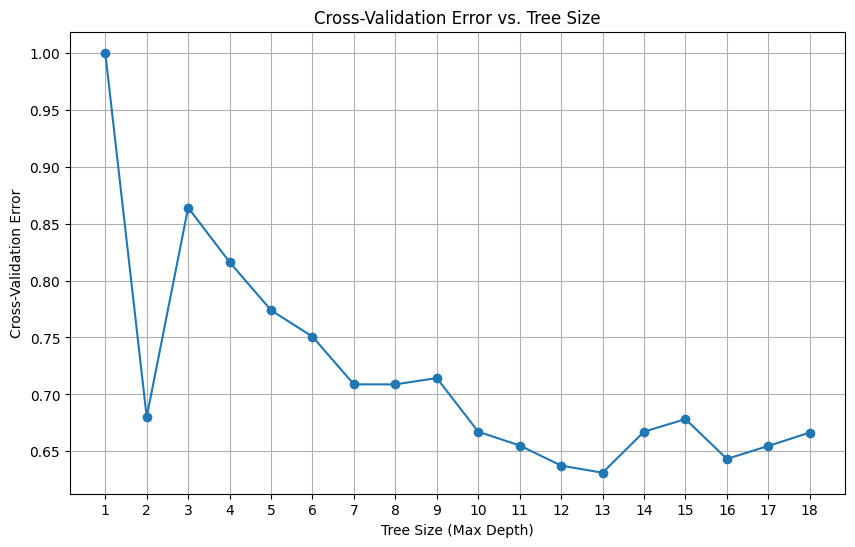

In [61]:
# Plot cross-validation error against tree size
plt.figure(figsize=(10, 6))
plt.plot(depths, carts, marker='o', linestyle='-')
plt.title('Cross-Validation Error vs. Tree Size')
plt.xlabel('Tree Size (Max Depth)')
plt.ylabel('Cross-Validation Error')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [62]:
# Find the index of the lowest cross-validation error
carts = np.array(carts)
min_error_index = np.argmin(carts)

# Calculate standard deviation of cross-validation errors
std_error = np.std(carts)

# Find one standard error above the lowest cross-validation error
one_std_error_above_min = carts[min_error_index] + std_error
print(one_std_error_above_min)

0.7234961148108783


In [63]:
carts
# Therefore, tree should be pruned at depth 6

array([1.        , 0.68014706, 0.86397059, 0.81617647, 0.77389706,
       0.75073529, 0.70882353, 0.70882353, 0.71433824, 0.66727941,
       0.65514706, 0.6375    , 0.63125   , 0.66727941, 0.67830882,
       0.64338235, 0.65477941, 0.66654412])

In [64]:
# Prune the decision tree with the optimal ccp_alpha
pruned_cart = DecisionTreeClassifier(random_state = seed, max_depth = 6)
pruned_cart.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=2407)

In [65]:
# Evaluate accuracy on the test set after pruning
y_pruned_pred = pruned_cart.predict(X_train)
accuracy_after_pruning = accuracy_score(y_train, y_pruned_pred)
print(f'Accuracy after pruning: {accuracy_after_pruning}')

Accuracy after pruning: 0.891156462585034


======== TRAIN SET RESULTS ========
Accuracy before pruning: 0.891156462585034

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.893684    0.860759  0.891156     0.877222      0.888277
recall       0.987209    0.402367  0.891156     0.694788      0.891156
f1-score     0.938122    0.548387  0.891156     0.743254      0.874113
support    860.000000  169.000000  0.891156  1029.000000   1029.000000


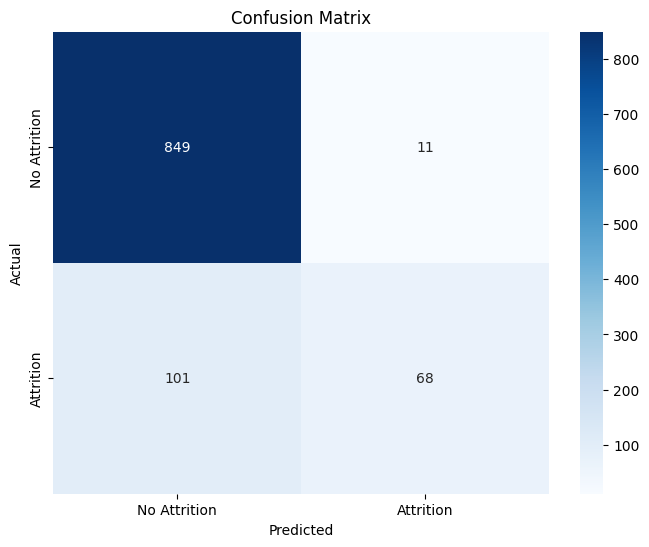

In [66]:
print("======== TRAIN SET RESULTS ========")
y_train_pred = pruned_cart.predict(X_train)
accuracy_before_pruning = accuracy_score(y_train, y_train_pred)
print(f'Accuracy before pruning: {accuracy_before_pruning}')
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.884615   0.583333  0.868182    0.733974      0.842162
recall       0.973545   0.225806  0.868182    0.599676      0.868182
f1-score     0.926952   0.325581  0.868182    0.626267      0.842214
support    189.000000  31.000000  0.868182  220.000000    220.000000


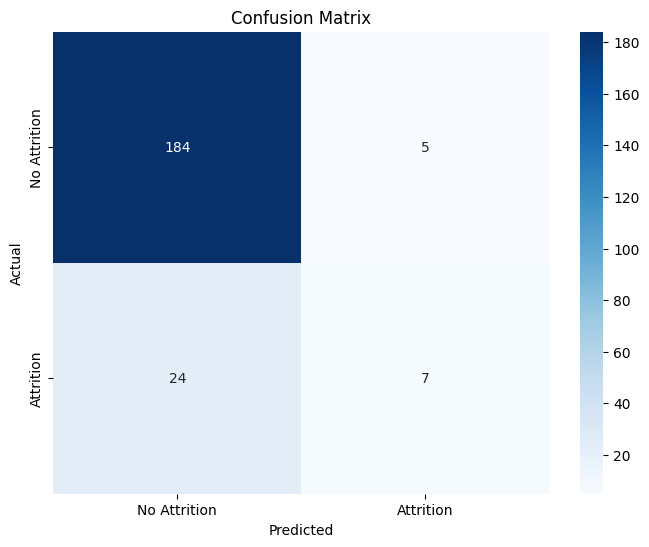

In [67]:
print("\n======== VALIDATION SET RESULTS ========")
y_validation_pred = pruned_cart.predict(X_validation)
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.862745   0.529412  0.837104    0.696078      0.806938
recall       0.956522   0.243243  0.837104    0.599882      0.837104
f1-score     0.907216   0.333333  0.837104    0.620275      0.811137
support    184.000000  37.000000  0.837104  221.000000    221.000000


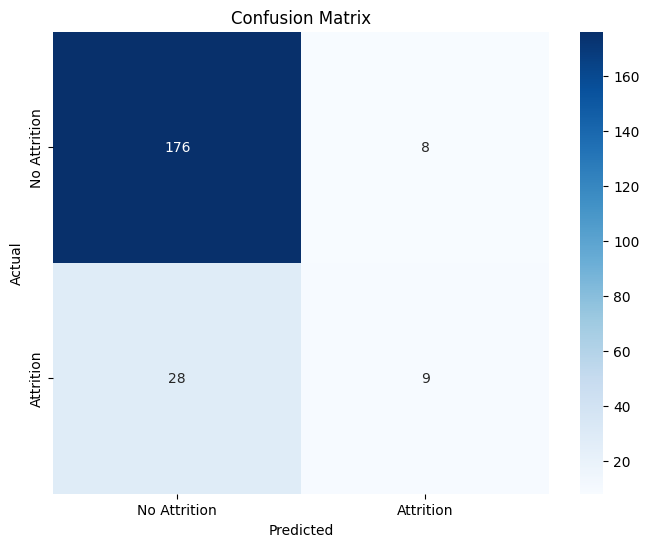

In [68]:
print("\n======== TEST SET RESULTS ========")
y_test_pred = pruned_cart.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

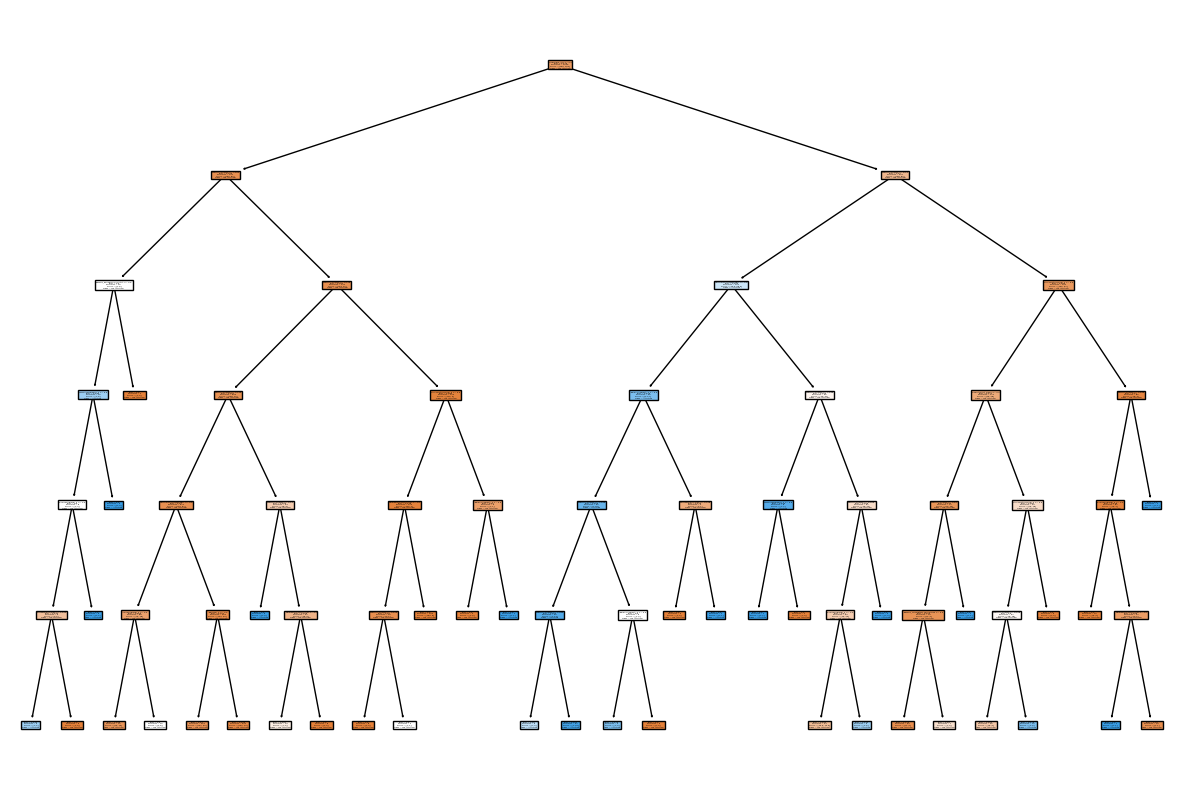

In [69]:
# Plot the pruned tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_cart, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

In [70]:
# Hyperparameter Tuning with Grid Search
param_grid = {'criterion':['gini','entropy']}

In [71]:
grid_search = GridSearchCV(estimator = pruned_cart, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=6, random_state=2407),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='recall')

In [72]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy'}
Best Accuracy Score: 0.2841911764705883


In [73]:
# Train the decision tree on the optimal parameters
optimised_cart = DecisionTreeClassifier(random_state = seed, max_depth = 8, criterion='entropy')
optimised_cart.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2407)

In [74]:
# Predictions
y_train_pred = optimised_cart.predict(X_train)
y_validation_pred = optimised_cart.predict(X_validation)
y_test_pred = optimised_cart.predict(X_test)

======== TRAIN SET RESULTS ========

Classification Report: 
                False       True  accuracy    macro avg  weighted avg
precision    0.920344    0.95000  0.923226     0.935172      0.925215
recall       0.994186    0.56213  0.923226     0.778158      0.923226
f1-score     0.955841    0.70632  0.923226     0.831080      0.914861
support    860.000000  169.00000  0.923226  1029.000000   1029.000000


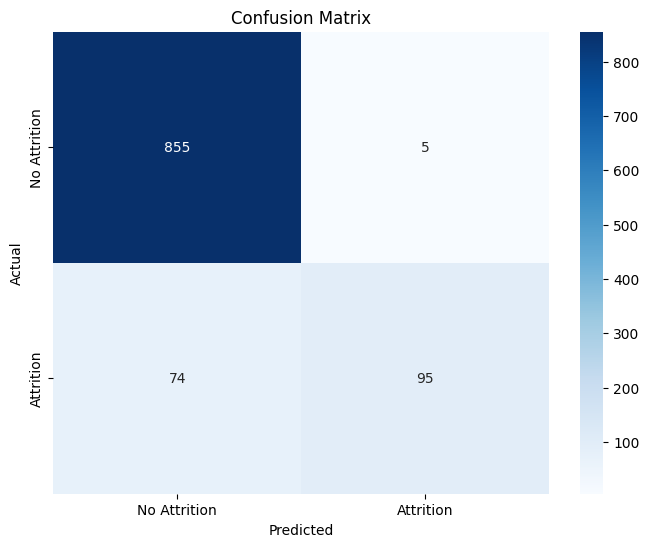

In [75]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.878049   0.400000  0.845455    0.639024      0.810687
recall       0.952381   0.193548  0.845455    0.572965      0.845455
f1-score     0.913706   0.260870  0.845455    0.587288      0.821715
support    189.000000  31.000000  0.845455  220.000000    220.000000


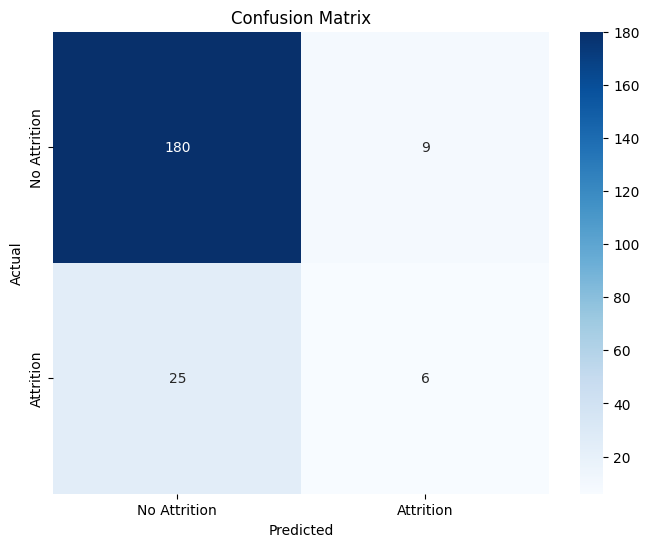

In [76]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.868020   0.458333  0.823529    0.663177      0.799430
recall       0.929348   0.297297  0.823529    0.613323      0.823529
f1-score     0.897638   0.360656  0.823529    0.629147      0.807736
support    184.000000  37.000000  0.823529  221.000000    221.000000


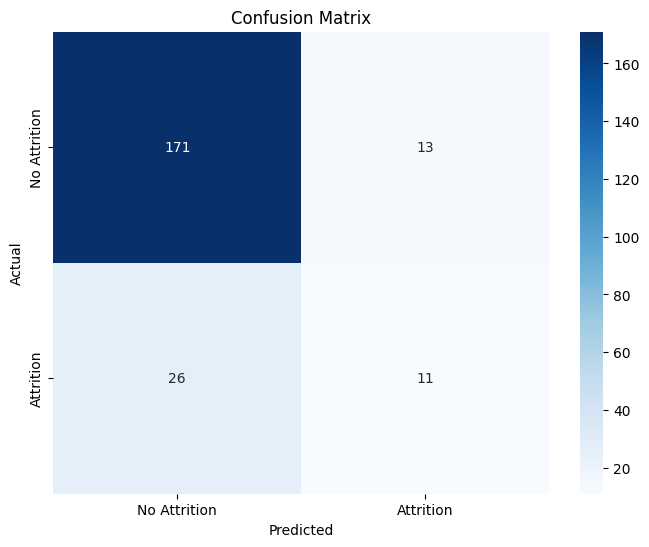

In [77]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

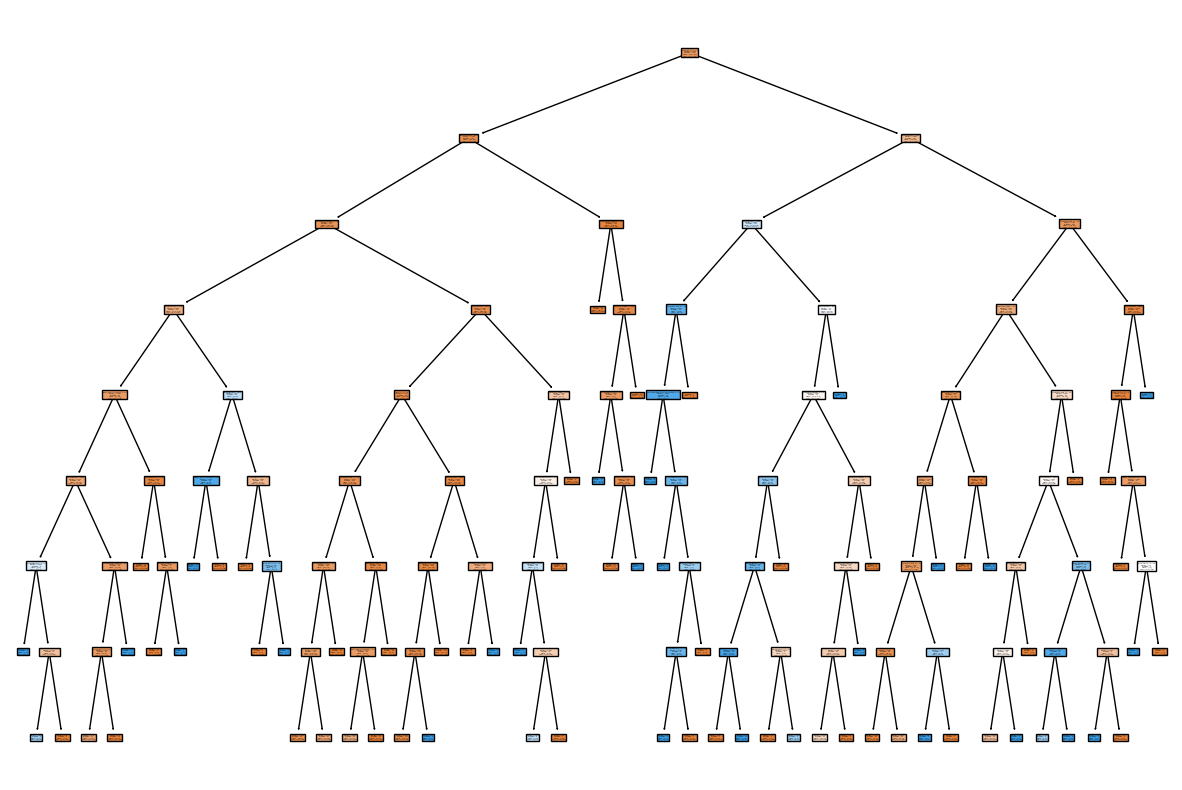

In [78]:
# Plot the pruned tree
plt.figure(figsize=(15, 10))
plot_tree(optimised_cart, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

In [79]:
y_pred_cart = optimised_cart.predict_proba(X_test)[:,1].ravel()

# Calculate the ROC curve
fpr_cart, tpr_cart, thresholds_keras = roc_curve(y_test, y_pred_cart)
auc_cart = auc(fpr_cart, tpr_cart)

# Calculate the Precision-Recall curve
precision_cart, recall_cart, _ = precision_recall_curve(y_test, y_pred_cart)
pr_auc_cart = average_precision_score(y_test, y_pred_cart)

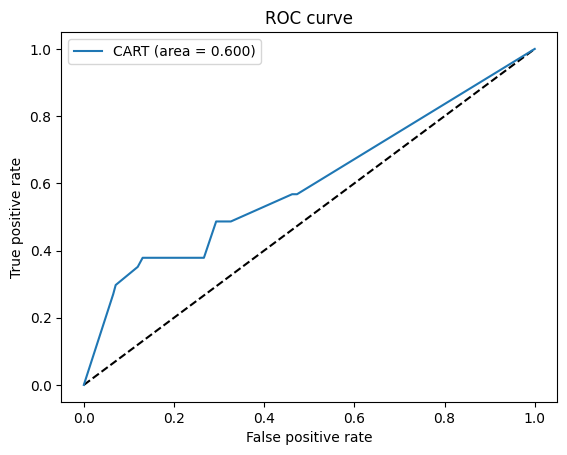

In [80]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cart, tpr_cart, label='CART (area = {:.3f})'.format(auc_cart))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

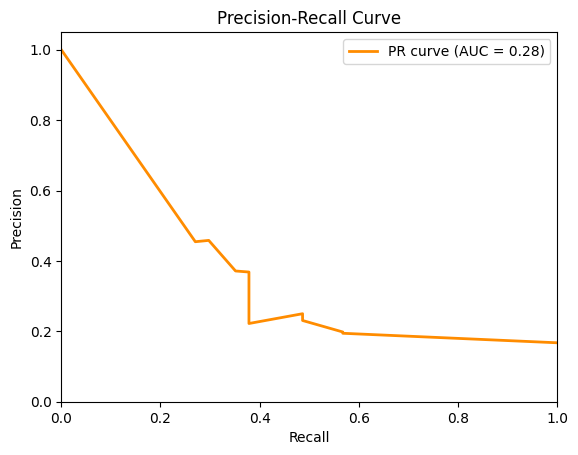

In [81]:
# Plot the Precision-Recall curve
plt.plot(recall_cart, precision_cart, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_cart)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

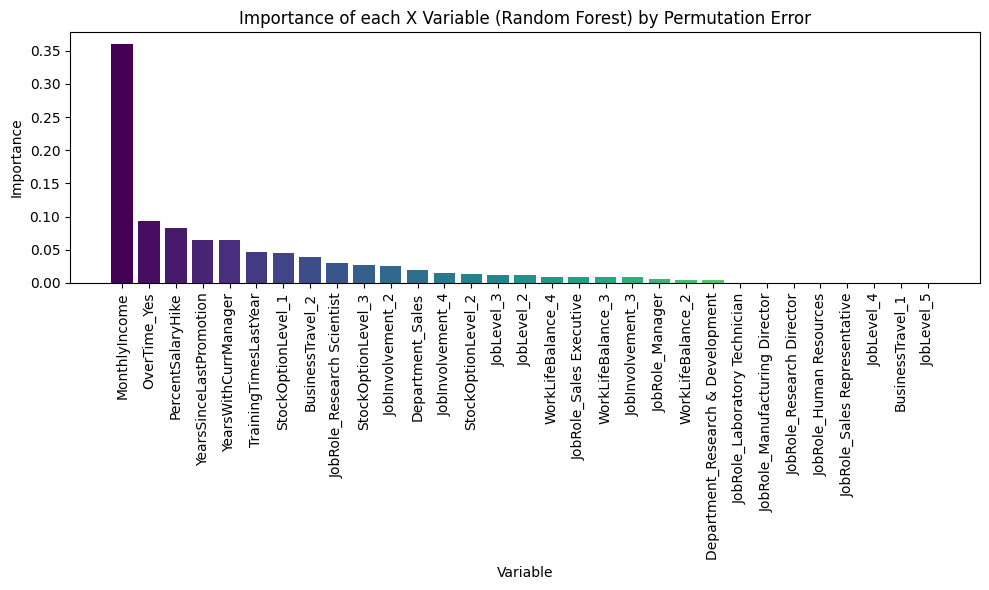

In [82]:
# Variable Importance
var_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': optimised_cart.feature_importances_
})

# Sort the DataFrame by importance in descending order
var_importance_sorted = var_importance.sort_values(by='Importance', ascending=False)

# Create a color gradient for the bars using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(var_importance_sorted)))

# Create the variable importance plot
plt.figure(figsize=(10, 6))
plt.bar(var_importance_sorted['Variable'], var_importance_sorted['Importance'], color=colors)
plt.title("Importance of each X Variable (CART) by Permutation Error")
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Decision trees are prone to overfitting as they grow to a large depth and capture noise or outliers in the training data.

Decision trees are also sensitive to small variations in the training data, leading to high variance in the model's predictions.

This makes them unable to generalise well to unseen data, particularly when they are overly complex or have not been pruned properly. Small changes in the training data can result in different decision trees, making the model unstable.

As such, an ensemble learning method that addresses the disadvantages of decision trees by aggregating multiple trees is used.

<h1>Random Forest</h1>

Random Forest is an ensemble learning technique that builds multiple decision trees during training and combines their predictions to improve the overall accuracy and robustness of the model. For classification, the final prediction of the Random Forest model is determined by a majority vote among the individual trees.

Random Forest employs a technique called bagging (Bootstrap Aggregating), which involves sampling instances with replacement from the training data to create multiple datasets. Each decision tree is trained independently on a bootstrap sample of the training data and a random subset of the features. This introduces diversity among the trees and helps prevent overfitting and improves generalisation.

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, auc

In [84]:
# Train a basic random forest model
rf = RandomForestClassifier(n_estimators = 500, random_state=seed, max_features = "sqrt", oob_score = True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=2407)

======== OOB RESULTS ========
OOB score: 0.8542274052478134
OOB error: 0.14577259475218662


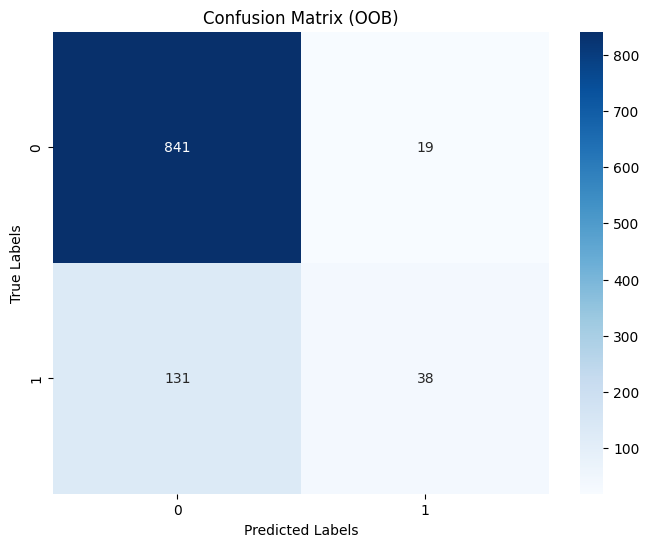

In [85]:
print("======== OOB RESULTS ========")
print("OOB score:", rf.oob_score_)
print("OOB error:", 1 - rf.oob_score_)

# Predictions
y_train_pred = rf.predict(X_train)
y_validation_pred = rf.predict(X_validation)
y_test_pred = rf.predict(X_test)

# Get the predictions on out-of-bag samples
oob_predictions = rf.oob_decision_function_
# Convert the probabilities to class labels
oob_predicted_labels = np.argmax(oob_predictions, axis=1)
# Compute the OOB confusion matrix
confusion_oob = confusion_matrix(y_train, oob_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_oob, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (OOB)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

======== TRAIN SET RESULTS ========

Classification Report: 
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    860.0  169.0       1.0     1029.0        1029.0


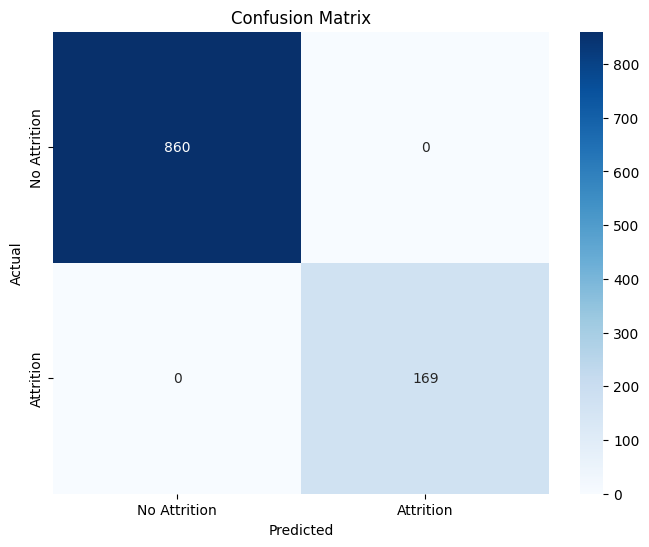

In [86]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.886792   0.875000  0.886364    0.880896      0.885131
recall       0.994709   0.225806  0.886364    0.610258      0.886364
f1-score     0.937656   0.358974  0.886364    0.648315      0.856114
support    189.000000  31.000000  0.886364  220.000000    220.000000


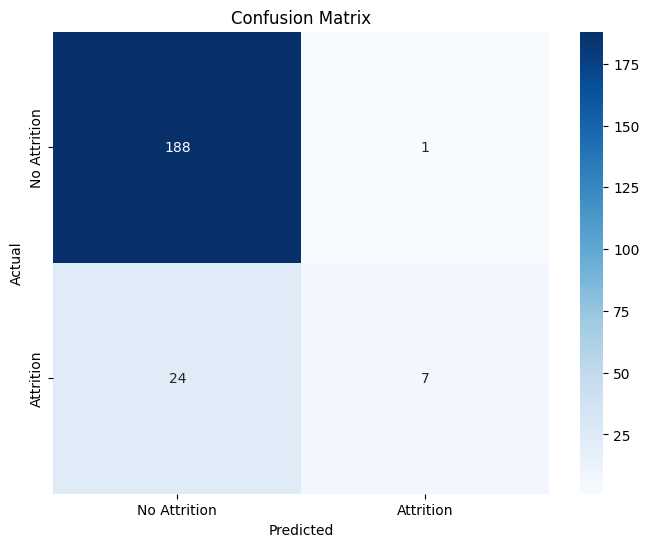

In [87]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_validation, y_validation_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model predicts perfectly on the train set, but has a low recall (0.13). This suggests that the model is overfitted to the train data. Overfitting can be avoided by varying the random subset feature.

SMOTE

In [88]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 500
error_rate = []

for i in range(min_estimators, max_estimators + 1, 5):
    randomforest = RandomForestClassifier(n_estimators = i, random_state=seed, oob_score = True)
    randomforest.fit(X_smote_train, y_smote_train)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - randomforest.oob_score_
    error_rate.append((i, oob_error))

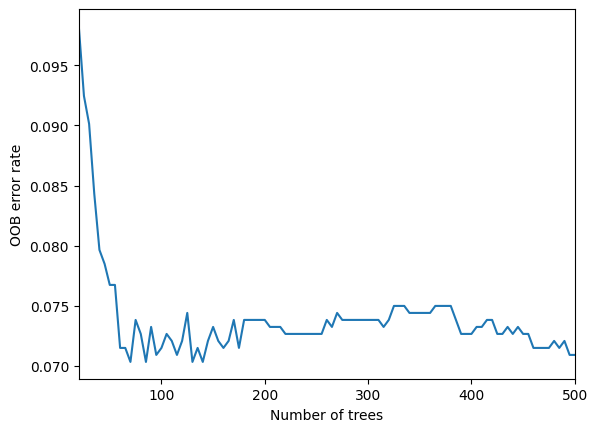

In [89]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
xvalues = []
yvalues = []
for ntrees, error in error_rate:
    xvalues.append(ntrees)
    yvalues.append(error)
    
plt.plot(xvalues, yvalues)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.show()

The OOB error rate has not stabilised. As such, more trees are needed.

In [90]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 2000
error_rate = []

for i in range(min_estimators, max_estimators + 1, 40):
    randomforest = RandomForestClassifier(n_estimators = i, random_state=seed, oob_score = True)
    randomforest.fit(X_smote_train, y_smote_train)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - randomforest.oob_score_
    error_rate.append((i, oob_error))

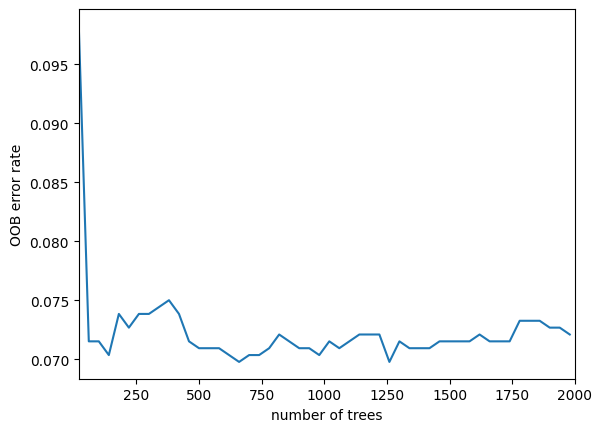

In [91]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
xvalues = []
yvalues = []
for ntrees, error in error_rate:
    xvalues.append(ntrees)
    yvalues.append(error)
    
plt.plot(xvalues, yvalues)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("number of trees")
plt.ylabel("OOB error rate")
plt.show()

In [92]:
# Hyperparameter Tuning with Grid Search
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt']}

In [93]:
# OOB error stabilises at 1000 trees
rf_model = RandomForestClassifier(random_state=seed, n_estimators=1000)
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=2407),
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='recall')

In [94]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'max_features': 0.3, 'min_samples_leaf': 2}
Best Accuracy Score: 0.9034883720930231


In [95]:
# Train random forest model
rf_smote = grid_search.best_estimator_
rf_smote.set_params(oob_score=True)
rf_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_features=0.3, min_samples_leaf=2, n_estimators=1000,
                       oob_score=True, random_state=2407)

In [96]:
# Predictions
y_train_pred = rf_smote.predict(X_smote_train)
y_validation_pred = rf_smote.predict(X_scaled_validation)
y_test_pred = rf_smote.predict(X_scaled_test)

======== OOB RESULTS ========
OOB score: 0.9203488372093023
OOB error: 0.07965116279069773


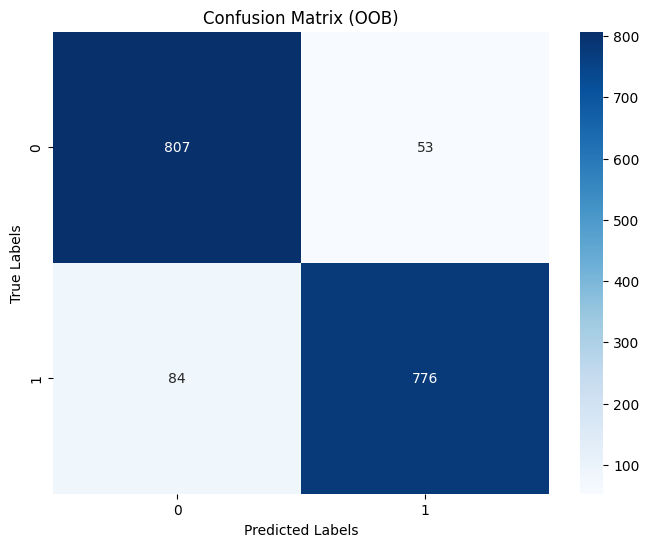

In [97]:
print("======== OOB RESULTS ========")
print("OOB score:", rf_smote.oob_score_)
print("OOB error:", 1 - rf_smote.oob_score_)

# Get the predictions on out-of-bag samples
oob_predictions = rf_smote.oob_decision_function_
# Convert the probabilities to class labels
oob_predicted_labels = np.argmax(oob_predictions, axis=1)
# Compute the OOB confusion matrix
confusion_oob = confusion_matrix(y_smote_train, oob_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_oob, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (OOB)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.979429    0.996450  0.987791     0.987939      0.987939
recall       0.996512    0.979070  0.987791     0.987791      0.987791
f1-score     0.987896    0.987683  0.987791     0.987790      0.987790
support    860.000000  860.000000  0.987791  1720.000000   1720.000000


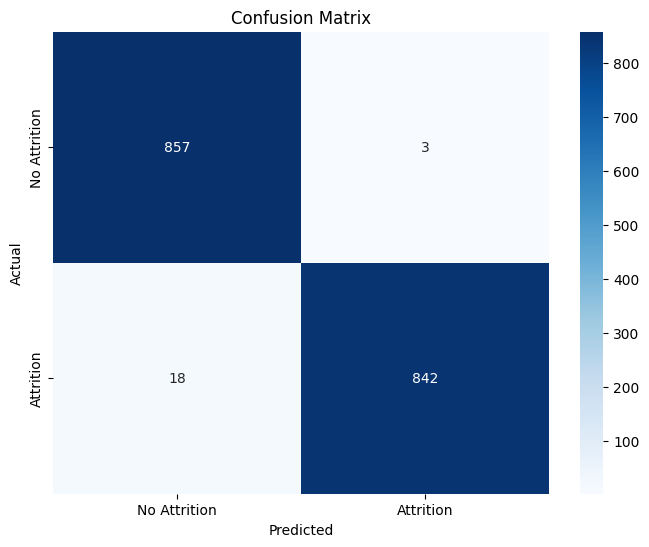

In [98]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_smote_train, y_train_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.900990   0.611111  0.877273    0.756051      0.860144
recall       0.962963   0.354839  0.877273    0.658901      0.877273
f1-score     0.930946   0.448980  0.877273    0.689963      0.863033
support    189.000000  31.000000  0.877273  220.000000    220.000000


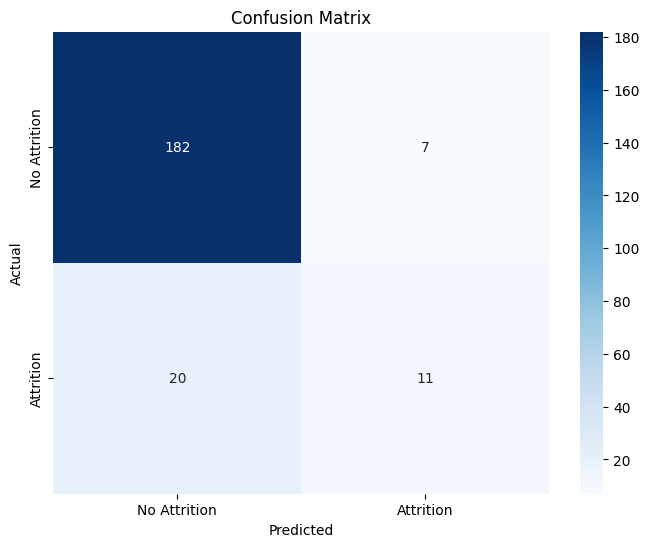

In [99]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.874372   0.545455  0.841629    0.709913      0.819304
recall       0.945652   0.324324  0.841629    0.634988      0.841629
f1-score     0.908616   0.406780  0.841629    0.657698      0.824598
support    184.000000  37.000000  0.841629  221.000000    221.000000


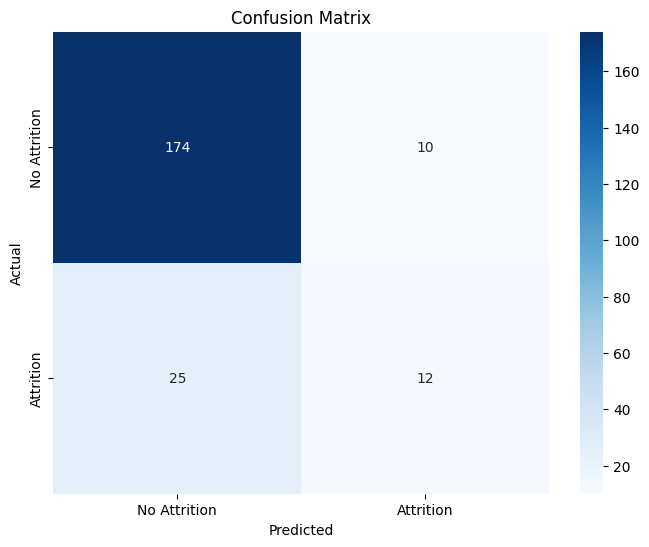

In [100]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ADASYN

In [101]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 2000
error_rate = []

for i in range(min_estimators, max_estimators + 1, 40):
    randomforest = RandomForestClassifier(n_estimators = i, random_state=seed, oob_score = True)
    randomforest.fit(X_adasyn_train, y_adasyn_train)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - randomforest.oob_score_
    error_rate.append((i, oob_error))

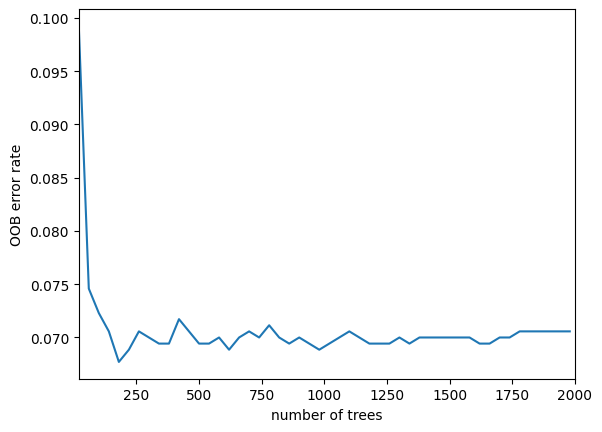

In [102]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
xvalues = []
yvalues = []
for ntrees, error in error_rate:
    xvalues.append(ntrees)
    yvalues.append(error)
    
plt.plot(xvalues, yvalues)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("number of trees")
plt.ylabel("OOB error rate")
plt.show()

In [103]:
# Hyperparameter Tuning with Grid Search
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt']}

In [104]:
rf_model = RandomForestClassifier(random_state=seed, n_estimators=1000)
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_adasyn_train, y_adasyn_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=2407),
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='recall')

In [105]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best recall Score:", grid_search.best_score_)

Best Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 2}
Best recall Score: 0.8885980592441266


In [106]:
# Train random forest model
rf_adasyn = grid_search.best_estimator_
rf_adasyn.set_params(oob_score=True)
rf_adasyn.fit(X_adasyn_train, y_adasyn_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=1000, oob_score=True,
                       random_state=2407)

In [107]:
# Predictions
y_train_pred = rf_adasyn.predict(X_adasyn_train)
y_validation_pred = rf_adasyn.predict(X_scaled_validation)
y_test_pred = rf_adasyn.predict(X_scaled_test)

======== OOB RESULTS ========
OOB score: 0.9236947791164659
OOB error: 0.07630522088353409


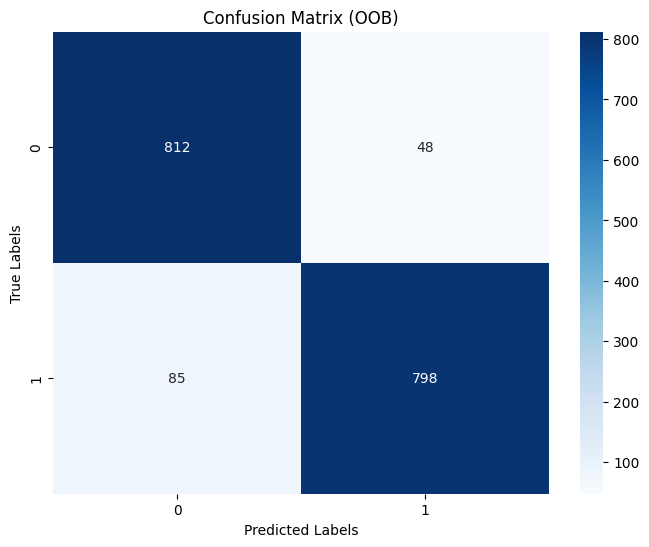

In [108]:
print("======== OOB RESULTS ========")
print("OOB score:", rf_adasyn.oob_score_)
print("OOB error:", 1 - rf_adasyn.oob_score_)

# Get the predictions on out-of-bag samples
oob_predictions = rf_adasyn.oob_decision_function_
# Convert the probabilities to class labels
oob_predicted_labels = np.argmax(oob_predictions, axis=1)
# Compute the OOB confusion matrix
confusion_oob = confusion_matrix(y_adasyn_train, oob_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_oob, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (OOB)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.971751    1.000000  0.985657     0.985876      0.986062
recall       1.000000    0.971687  0.985657     0.985844      0.985657
f1-score     0.985673    0.985640  0.985657     0.985657      0.985657
support    860.000000  883.000000  0.985657  1743.000000   1743.000000


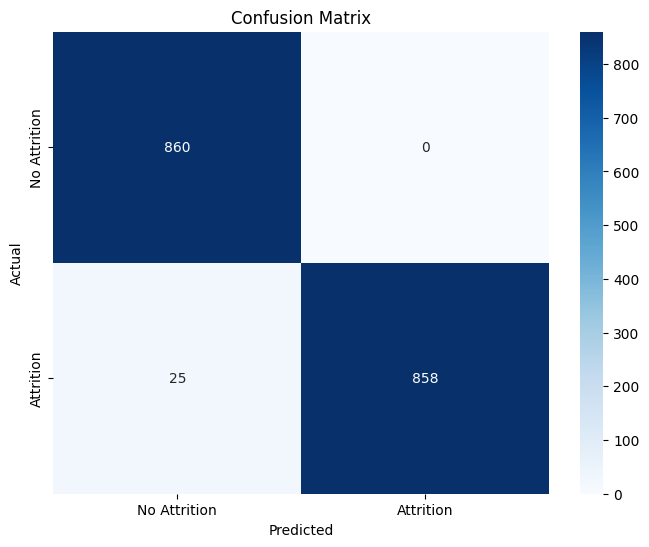

In [109]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_adasyn_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.901478   0.647059  0.881818    0.774268      0.865628
recall       0.968254   0.354839  0.881818    0.661546      0.881818
f1-score     0.933673   0.458333  0.881818    0.696003      0.866694
support    189.000000  31.000000  0.881818  220.000000    220.000000


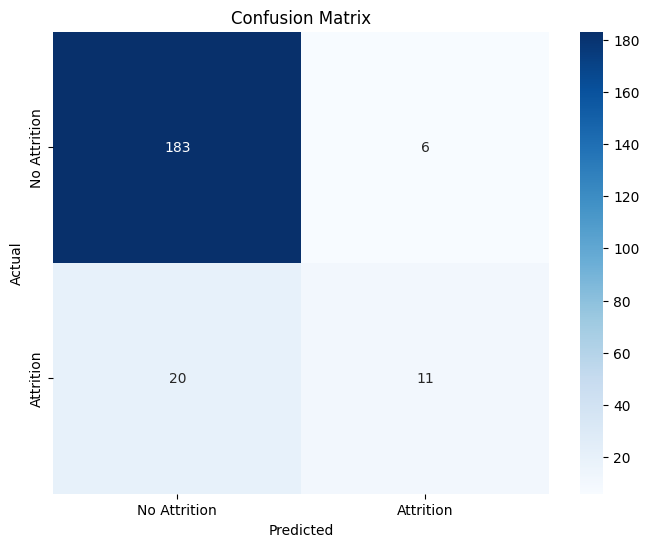

In [110]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_validation, y_validation_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.874372   0.545455  0.841629    0.709913      0.819304
recall       0.945652   0.324324  0.841629    0.634988      0.841629
f1-score     0.908616   0.406780  0.841629    0.657698      0.824598
support    184.000000  37.000000  0.841629  221.000000    221.000000


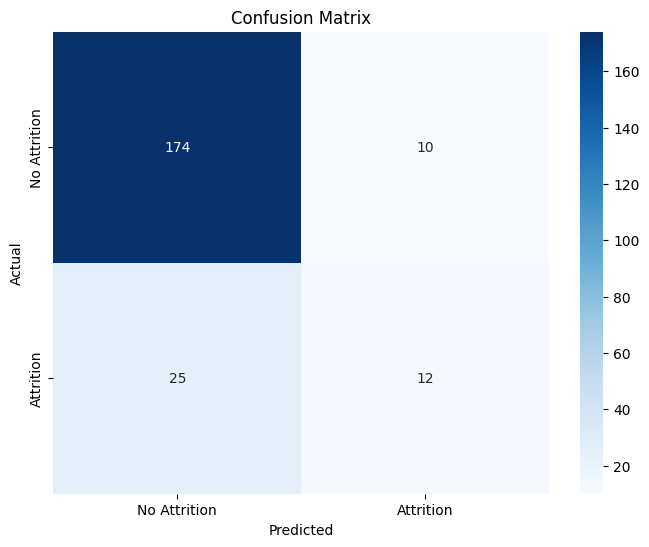

In [111]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [112]:
y_pred_rf = rf_adasyn.predict_proba(X_scaled_test)[:,1].ravel()

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_keras = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the Precision-Recall curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
pr_auc_rf = average_precision_score(y_test, y_pred_rf)

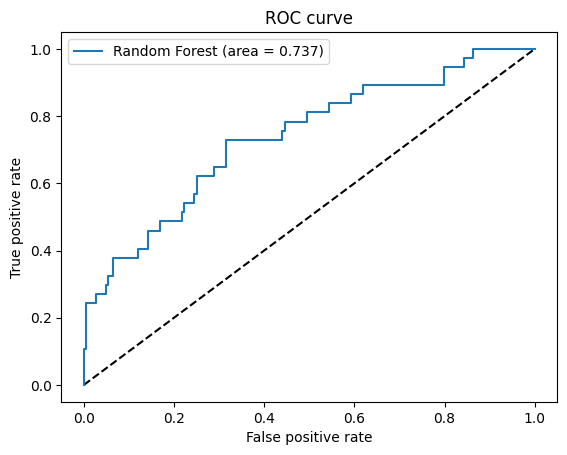

In [113]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

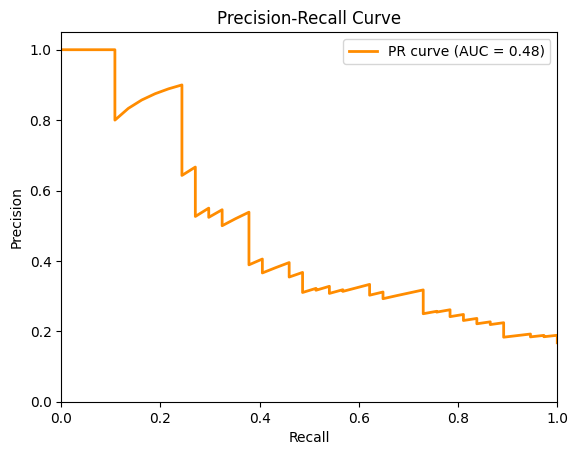

In [114]:
# Plot the Precision-Recall curve
plt.plot(recall_rf, precision_rf, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_rf)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

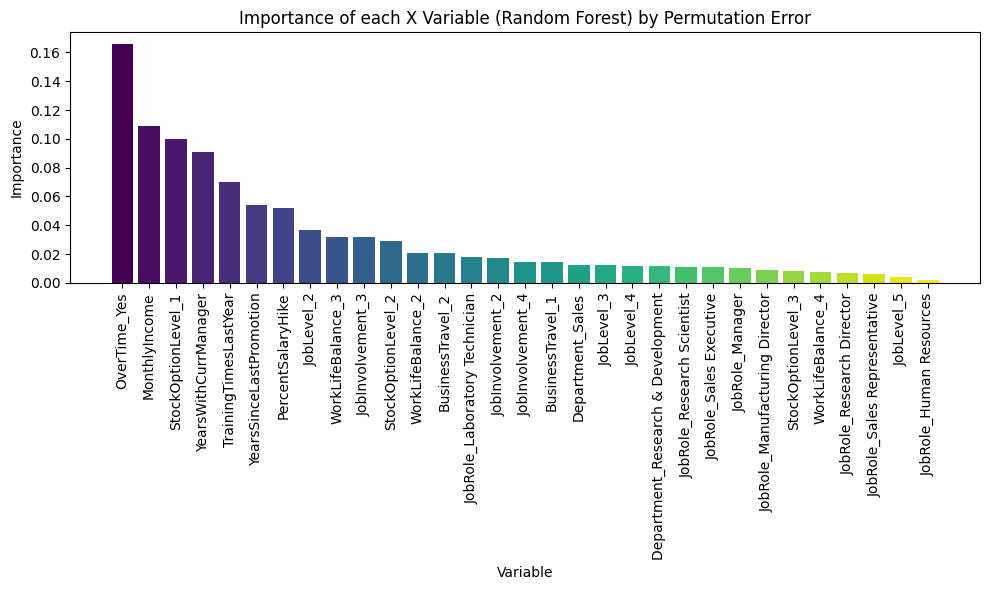

In [115]:
# Variable Importance
rf_var_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': rf_adasyn.feature_importances_
})

# Sort the DataFrame by importance in descending order
rf_var_importance_sorted = rf_var_importance.sort_values(by='Importance', ascending=False)

# Create a color gradient for the bars using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(var_importance_sorted)))

# Create the variable importance plot
plt.figure(figsize=(10, 6))
plt.bar(rf_var_importance_sorted['Variable'], rf_var_importance_sorted['Importance'], color=colors)
plt.title("Importance of each X Variable (Random Forest) by Permutation Error")
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h1>XGBoost</h1>

XGBoost is a machine learning algorithm based on the gradient boosting framework, which sequentially trains an ensemble of weak learners (such as decision trees) and combines their predictions to improve overall model performance.

XGBoost incorporates L1 and L2 regularisation terms into the objective function to prevent overfitting and improve generalisation. XGBoost also uses tree pruning to control model complexity and prevent overfitting. It prunes trees during the learning process based on user-defined criteria such as maximum depth, minimum child weight, and minimum gain.

Most importantly, XGBoost measures the contribution of each feature to model predictions, which helps us understand the relative importance of different features in the dataset to derive business insights.

In [116]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [117]:
# A parameter grid for optimisation
params = {
        'n_estimators' : [25, 50, 100, 200, 500],
        'learning_rate' : [0.001, 0.01, 0.02, 0.05],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.01, 0.1, 0.5, 1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 10, 12, 14, 16]
        }

In [118]:
# Create XGBoost model
xgb_cfl = xgb.XGBClassifier(random_state = 2407, n_jobs = -1)

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=800, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=2407)

random_search.fit(X_smote_train, y_smote_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=2407, ...),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.01, 0.1, 0.5, 1, 1.5],
                                        'learning_rate': [0.001, 0.01, 0.02,
                                                          0.05],
                                        'max_depth': [5, 10, 12, 14, 16],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [25, 50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=2407, scoring='recall', verbose=3)

In [119]:
print('Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
print('Best accuracy:', random_search.best_score_)

Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 14, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best accuracy: 0.8872093023255815


In [120]:
xgb_smote = random_search.best_estimator_
xgb_smote.fit(X_smote_train, y_smote_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=2407, ...)

In [121]:
y_train_pred = xgb_smote.predict(X_smote_train)
y_validation_pred = xgb_smote.predict(X_scaled_validation)
y_test_pred = xgb_smote.predict(X_scaled_test)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.962627    0.988053     0.975     0.975340      0.975340
recall       0.988372    0.961628     0.975     0.975000      0.975000
f1-score     0.975330    0.974661     0.975     0.974996      0.974996
support    860.000000  860.000000     0.975  1720.000000   1720.000000


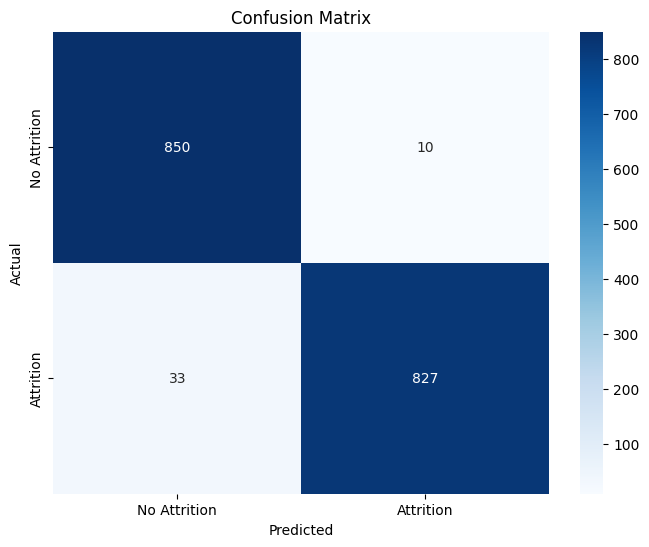

In [122]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_smote_train, y_train_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.888350   0.571429  0.868182    0.729889      0.843692
recall       0.968254   0.258065  0.868182    0.613159      0.868182
f1-score     0.926582   0.355556  0.868182    0.641069      0.846119
support    189.000000  31.000000  0.868182  220.000000    220.000000


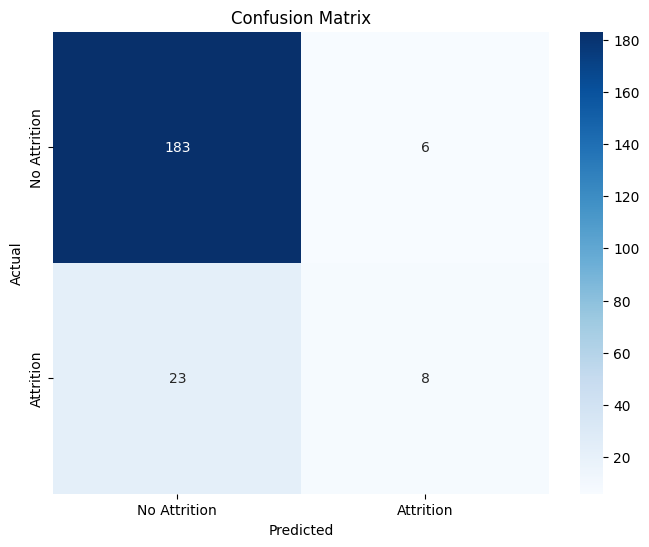

In [123]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.873096   0.500000  0.832579    0.686548      0.810632
recall       0.934783   0.324324  0.832579    0.629553      0.832579
f1-score     0.902887   0.393443  0.832579    0.648165      0.817596
support    184.000000  37.000000  0.832579  221.000000    221.000000


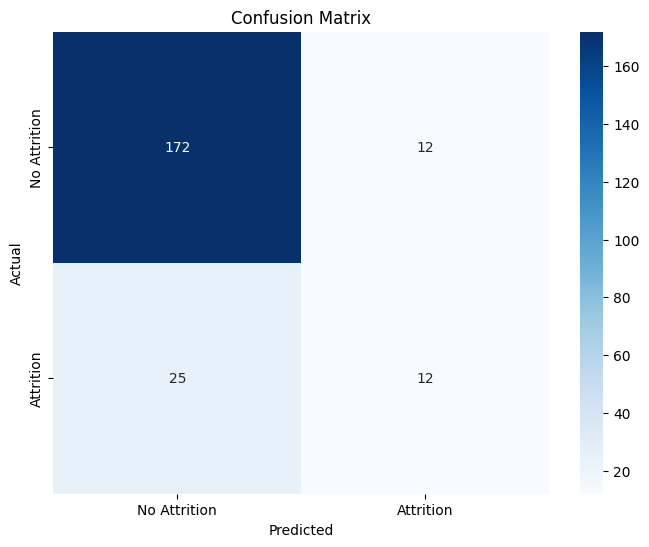

In [124]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [125]:
# Create XGBoost model
xgb_adasyn = xgb.XGBClassifier(random_state = 2407, n_jobs = -1)

random_search = RandomizedSearchCV(xgb_adasyn, param_distributions=params, n_iter=800, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=2407)

random_search.fit(X_adasyn_train, y_adasyn_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=2407, ...),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.01, 0.1, 0.5, 1, 1.5],
                                        'learning_rate': [0.001, 0.01, 0.02,
                                                          0.05],
                                        'max_depth': [5, 10, 12, 14, 16],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [25, 50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=2407, scoring='recall', verbose=3)

In [126]:
print('Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
print('Best accuracy:', random_search.best_score_)

Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 25, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.001, 'gamma': 0.5, 'colsample_bytree': 0.6}
Best accuracy: 0.9853107344632768


In [127]:
xgb_adasyn = random_search.best_estimator_
xgb_adasyn.fit(X_adasyn_train, y_adasyn_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=-1,
              num_parallel_tree=None, random_state=2407, ...)

In [128]:
y_train_pred = xgb_adasyn.predict(X_adasyn_train)
y_validation_pred = xgb_adasyn.predict(X_scaled_validation)
y_test_pred = xgb_adasyn.predict(X_scaled_test)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.972509    0.602617  0.664372     0.787563      0.785122
recall       0.329070    0.990940  0.664372     0.660005      0.664372
f1-score     0.491746    0.749465  0.664372     0.620605      0.622306
support    860.000000  883.000000  0.664372  1743.000000   1743.000000


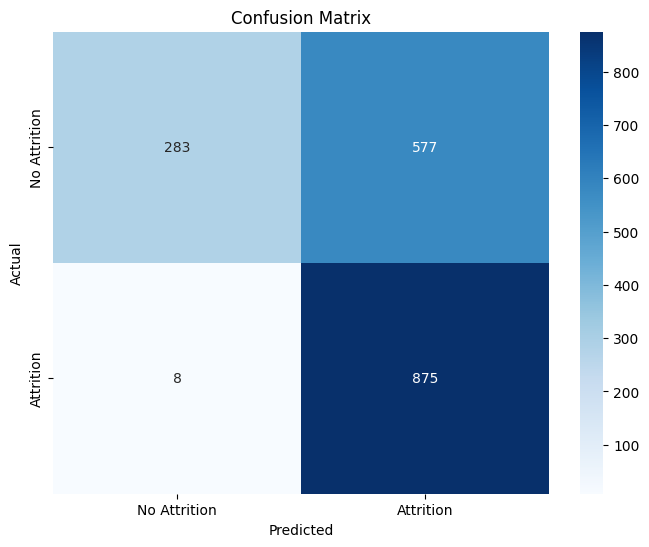

In [129]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_adasyn_train, y_train_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.970149   0.189542  0.427273    0.579846      0.860155
recall       0.343915   0.935484  0.427273    0.639700      0.427273
f1-score     0.507812   0.315217  0.427273    0.411515      0.480674
support    189.000000  31.000000  0.427273  220.000000    220.000000


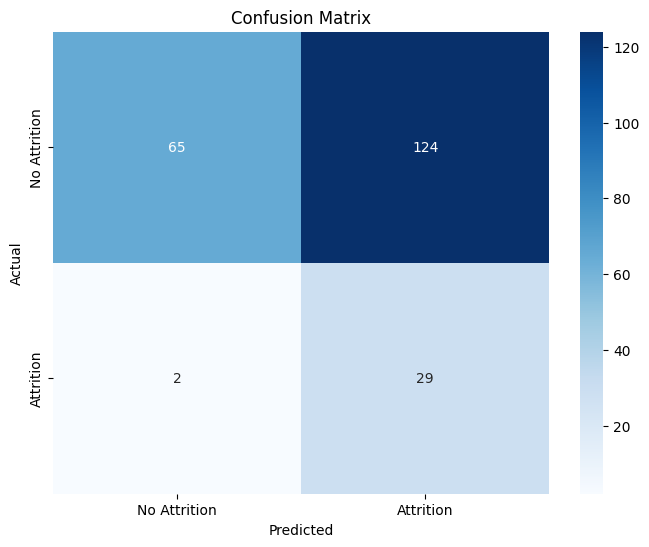

In [130]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.950000   0.234043  0.493213    0.592021      0.830134
recall       0.413043   0.891892  0.493213    0.652468      0.493213
f1-score     0.575758   0.370787  0.493213    0.473272      0.541441
support    184.000000  37.000000  0.493213  221.000000    221.000000


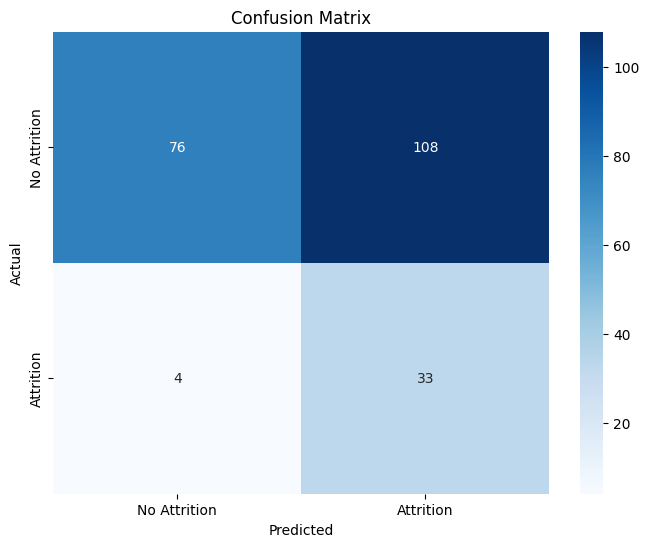

In [131]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SMOTE is better

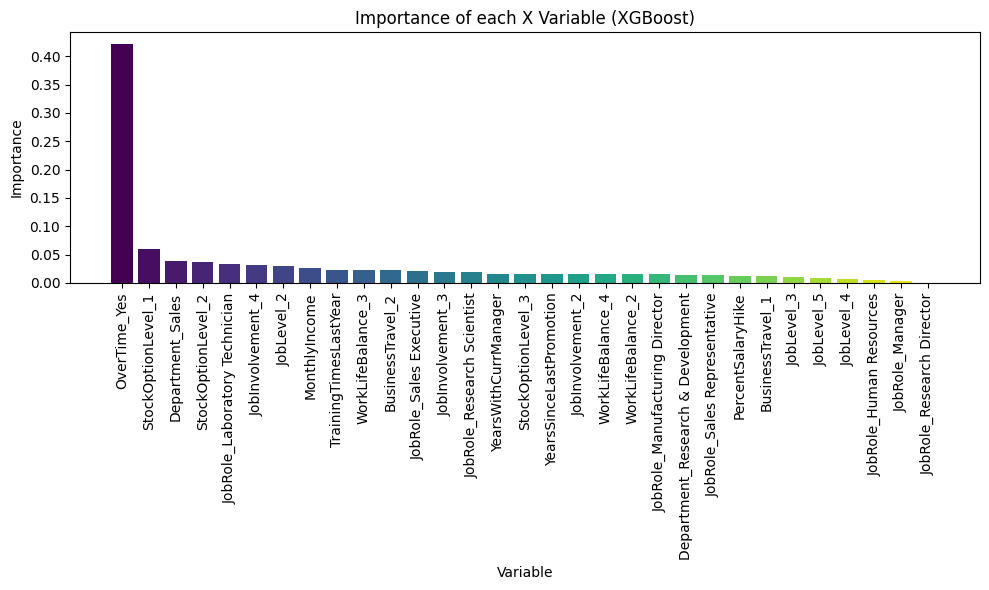

In [132]:
# Create the variable importance plot
xgb_var_importance = pd.DataFrame({
    'Variable': X_train.columns, 
    'Importance': xgb_smote.feature_importances_
})
xgb_var_importance_sorted = xgb_var_importance.sort_values(by='Importance',ascending=False)

# Create a color gradient for the bars using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(X_train.columns)))

plt.figure(figsize = (10,6))
plt.bar(xgb_var_importance_sorted['Variable'], xgb_var_importance_sorted['Importance'], color=colors)
plt.title('Importance of each X Variable (XGBoost)')
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [133]:
y_pred_xgb = xgb_smote.predict_proba(X_scaled_test)[:,1].ravel()

#  Calculate the ROC curve
fpr_xgb, tpr_xgb, thresholds_keras = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate the Precision-Recall curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)
pr_auc_xgb = average_precision_score(y_test, y_pred_xgb)

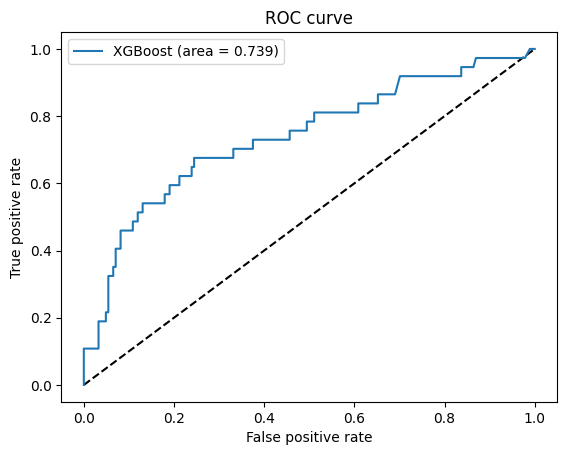

In [134]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = {:.3f})'.format(auc_xgb))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

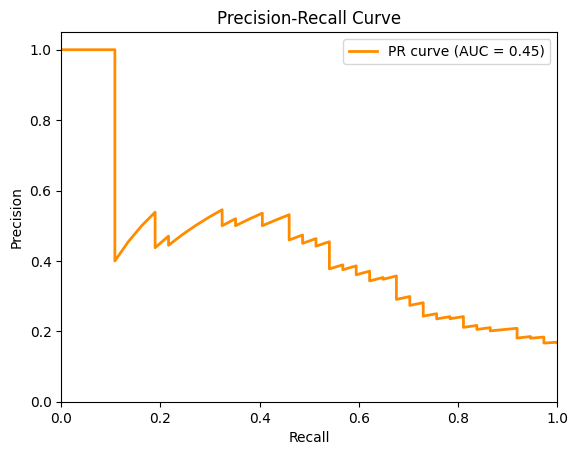

In [135]:
# Plot the Precision-Recall curve
plt.plot(recall_xgb, precision_xgb, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_xgb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

<h1>Model Comparison</h1>

The ROC curve represents the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for different classification thresholds.
The true positive rate (TPR), also known as recall, measures the proportion of actual positive cases that are correctly identified by the model while the false positive rate (FPR) measures the proportion of actual negative cases that are incorrectly classified as positive by the model.

The closer the ROC curve is to the top-left corner, the better the classifier's performance in distinguishing between positive and negative cases. A higher area under curve (AUC) indicates better discrimination ability, with a maximum value of 1 for a perfect classifier.

Considering the tradeoff between TP and FP, increasing TPR even at the expense of increasing FPR is preferred as the cost of attrition is generally higher than preventive measures to reduce attrition. However, too many incorrect predictions is also undesirable as it would lead to excessive losses.

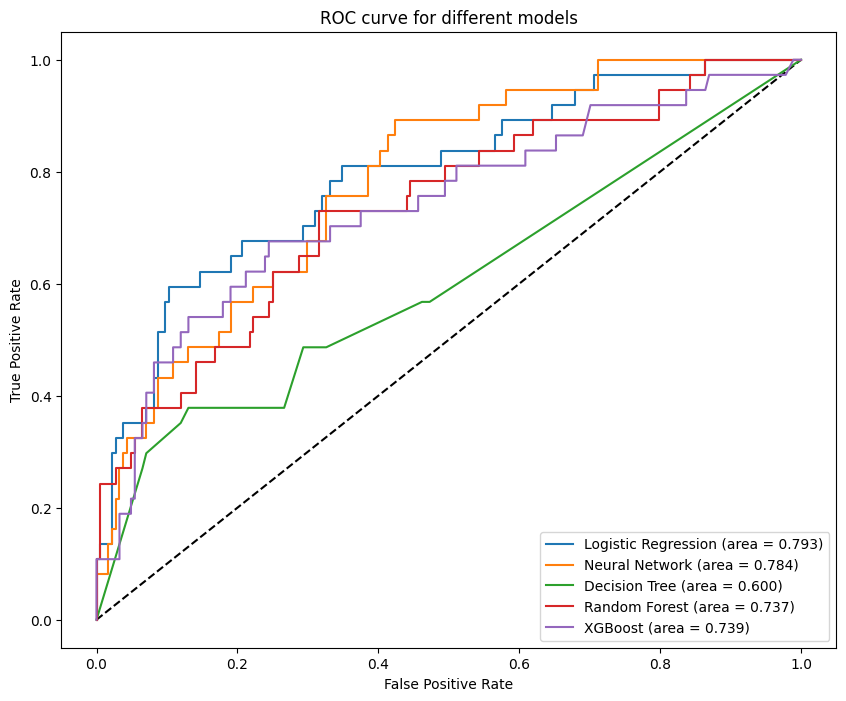

In [136]:
classifiers = ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'XGBoost']
auc_values = [auc_log, auc_nn, auc_cart, auc_rf, auc_xgb]
fpr_values = [fpr_log, fpr_nn, fpr_cart, fpr_rf, fpr_xgb]
tpr_values = [tpr_log, tpr_nn, tpr_cart, tpr_rf, tpr_xgb]

# Plotting the ROC curves for each classifier
plt.figure(figsize=(10, 8))

# Plot the diagonal (random guess)
plt.plot([0, 1], [0, 1], 'k--')

# Plot ROC curve for each classifier
for classifier, fpr, tpr, auc_value in zip(classifiers, fpr_values, tpr_values, auc_values):
    plt.plot(fpr, tpr, label='{} (area = {:.3f})'.format(classifier, auc_value))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for different models')
plt.legend(loc='lower right')
plt.show()

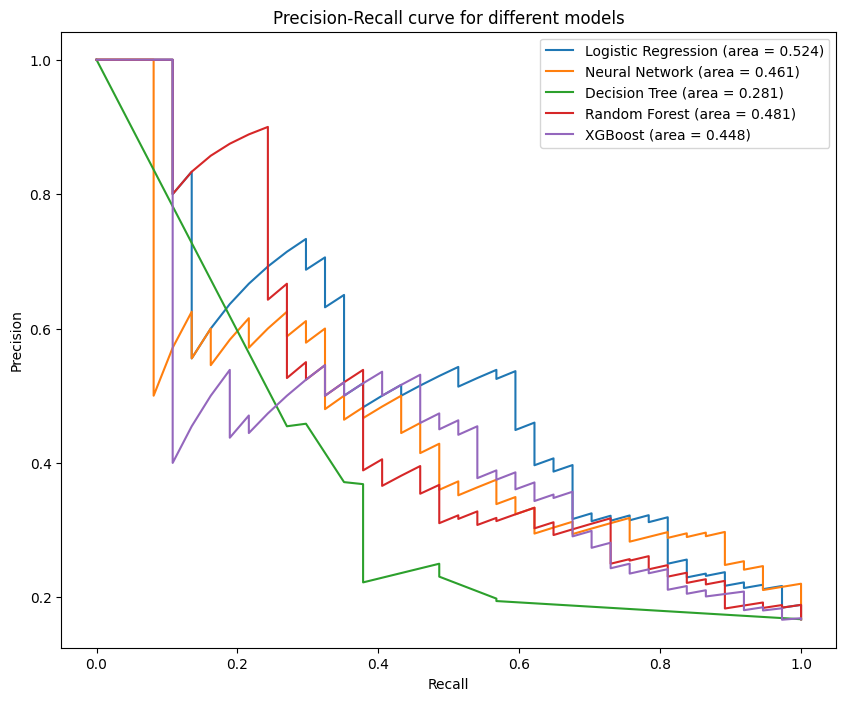

In [137]:
classifiers = ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'XGBoost']
pr_auc_values = [pr_auc_log, pr_auc_nn, pr_auc_cart, pr_auc_rf, pr_auc_xgb]
recall_values = [recall_log, recall_nn, recall_cart, recall_rf, recall_xgb]
precision_values = [precision_log, precision_nn, precision_cart, precision_rf, precision_xgb]

# Plotting the PR curves for each classifier
plt.figure(figsize=(10, 8))

for classifier, recall, precision, pr_auc_value in zip(classifiers, recall_values, precision_values, pr_auc_values):
    plt.plot(recall, precision, label='{} (area = {:.3f})'.format(classifier, pr_auc_value))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for different models')
plt.legend(loc='best')
plt.show()

From the graph, Neural Network is the best model as it is able to achieve the highest TPR to FPR ratio across a wide range of classification thresholds. Although Logistic Regression overtakes Neural Network at a point, maximising the TPR is preferred and Neural Network is the best model to suit our business needs.